In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import LSTM, Dense
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers.convolutional import Conv1D
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras.layers import TimeDistributed
from keras.models import Model
from keras import regularizers
from keras.layers  import  LSTM
from keras.optimizers import Adam
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector
from keras.models import Model
import tensorflow as tf
import math, sys, time
import datetime
from tensorflow.keras.callbacks import ModelCheckpoint

from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers
# Multiple Inputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
#from tensorflow.keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.models import load_model
import math, sys, time
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GRU, TimeDistributed, LSTM
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten, Dropout, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

from pandas._testing import assert_frame_equal
from pandas.testing import assert_index_equal
import warnings
warnings.filterwarnings('ignore')

2023-05-10 12:29:42.891882: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from EEGP import EEGPreprocessor
from neuralstart_filter import EEGFilter
import pandas as pd
import numpy as np
from sklearn.utils import resample
from scipy.signal import butter, filtfilt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pywt
import time
from encoder_neuralstart import LabelEncoderModel
from scaler_neuralstar import ScalerHandler
from Neuralstart_process2 import EEGDataPreprocessor1
from Neuralstart_process3 import EEGDataPreprocessor2
from neuralstart_dual_simultané_thread import DualDataPreprocessor
from neuralstart_ica_process import EEGDataPreprocessor_ica
from neuralstar_pca_process import PCAHandler
from encoder_neuralstart import LabelEncoderModel
from scaler_neuralstar import ScalerHandler
from neural_start_sqrt import ecg_wavelet
from hajj_neuralstart import HajjProcessor

In [ ]:
df2 = pd.read_csv("/Users/chajjar/Documents/DataAnalyse/A/data-aekov-30m2s.csv")
df = df2.iloc[:100]

In [ ]:
df.columns

In [3]:
df2 = pd.read_csv("/Users/chajjar/Documents/DataAnalyse/A/data-aekov-30m2s-v3.csv")
df = df2.iloc[:100000]#1750:2499///2499:3253///3253:4005//4005:4775//4775:5506///5506:6257///6257:7009//7009:7759
#7759:8509//8509:9262///9262:10015//10015:10768//10768:11514///11514:12769//12769:13516///13516:14271
df2 = df[df["Validation Indicator"] != 0]

In [4]:
df = df2[['EEG 1', 'EEG 2', 'EEG 3', 'EEG 4', 'EEG 5', 'EEG 6', 'EEG 7', 'EEG 8',
           'Accelerometer X', 'Accelerometer Y', 'Accelerometer Z', 'Gyroscope X',
           'Gyroscope Y', 'Gyroscope Z']]

In [5]:
df3 = df2[['Direction']]
df3 = df3.reset_index(drop=True)

In [6]:
df.columns

Index(['EEG 1', 'EEG 2', 'EEG 3', 'EEG 4', 'EEG 5', 'EEG 6', 'EEG 7', 'EEG 8',
       'Accelerometer X', 'Accelerometer Y', 'Accelerometer Z', 'Gyroscope X',
       'Gyroscope Y', 'Gyroscope Z'],
      dtype='object')

In [7]:
import mne
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Créer un objet MNE Raw à partir du DataFrame
info = mne.create_info(ch_names=list(df.columns), sfreq=250, ch_types='eeg')
raw = mne.io.RawArray(df.T.to_numpy() * 1e-6, info)

# Appliquer un filtre passe-bande pour conserver les fréquences d'intérêt (par exemple, entre 1 Hz et 50 Hz)
raw.filter(1, 3)

# Utiliser la Régression des Composantes Principales (rPCA) pour décomposer les signaux
n_components = 0.99  # À ajuster selon vos données
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(raw.get_data().T)

# Utiliser la régression linéaire pour estimer les artefacts dans les données
reg = LinearRegression()
reg.fit(pca_data, raw.get_data().T)

# Reconstruire les données nettoyées à partir des composantes principales
clean_data = (raw.get_data().T - reg.predict(pca_data)).T

# Créer un nouvel objet MNE Raw avec les données nettoyées
raw_clean = mne.io.RawArray(clean_data, info)
sfreq = raw_clean.info['sfreq']

Creating RawArray with float64 data, n_channels=14, n_times=100000
    Range : 0 ... 99999 =      0.000 ...   399.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 3 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 3.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Filter length: 825 samples (3.300 sec)

Creating RawArray with float64 data, n_channels=14, n_times=100000
    Range : 0 ... 99999 =      0.000 ...   399.996 secs
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


In [8]:
def raw_to_dataframe(raw_data):
    data, times = raw_data[:]
    df = pd.DataFrame(data.T, columns=raw_data.ch_names, index=times)
    return df

raw_clean_df = raw_to_dataframe(raw_clean)

In [9]:
def plot_data(df):
    columns = ["EEG 1", "EEG 2", "EEG 3", "EEG 4", "EEG 5", 
               "EEG 6", "EEG 7", "EEG 8", "Accelerometer X","Accelerometer Y", "Accelerometer Z",
               "Gyroscope X","Gyroscope Y", "Gyroscope Z"]
    plt.figure(figsize=(20, 15))
    for i, column in enumerate(columns):
        plt.subplot(len(columns), 1, i+1)
        plt.plot(df[column])
        plt.title(column, y=0, loc='right')
    plt.tight_layout()
    plt.show()

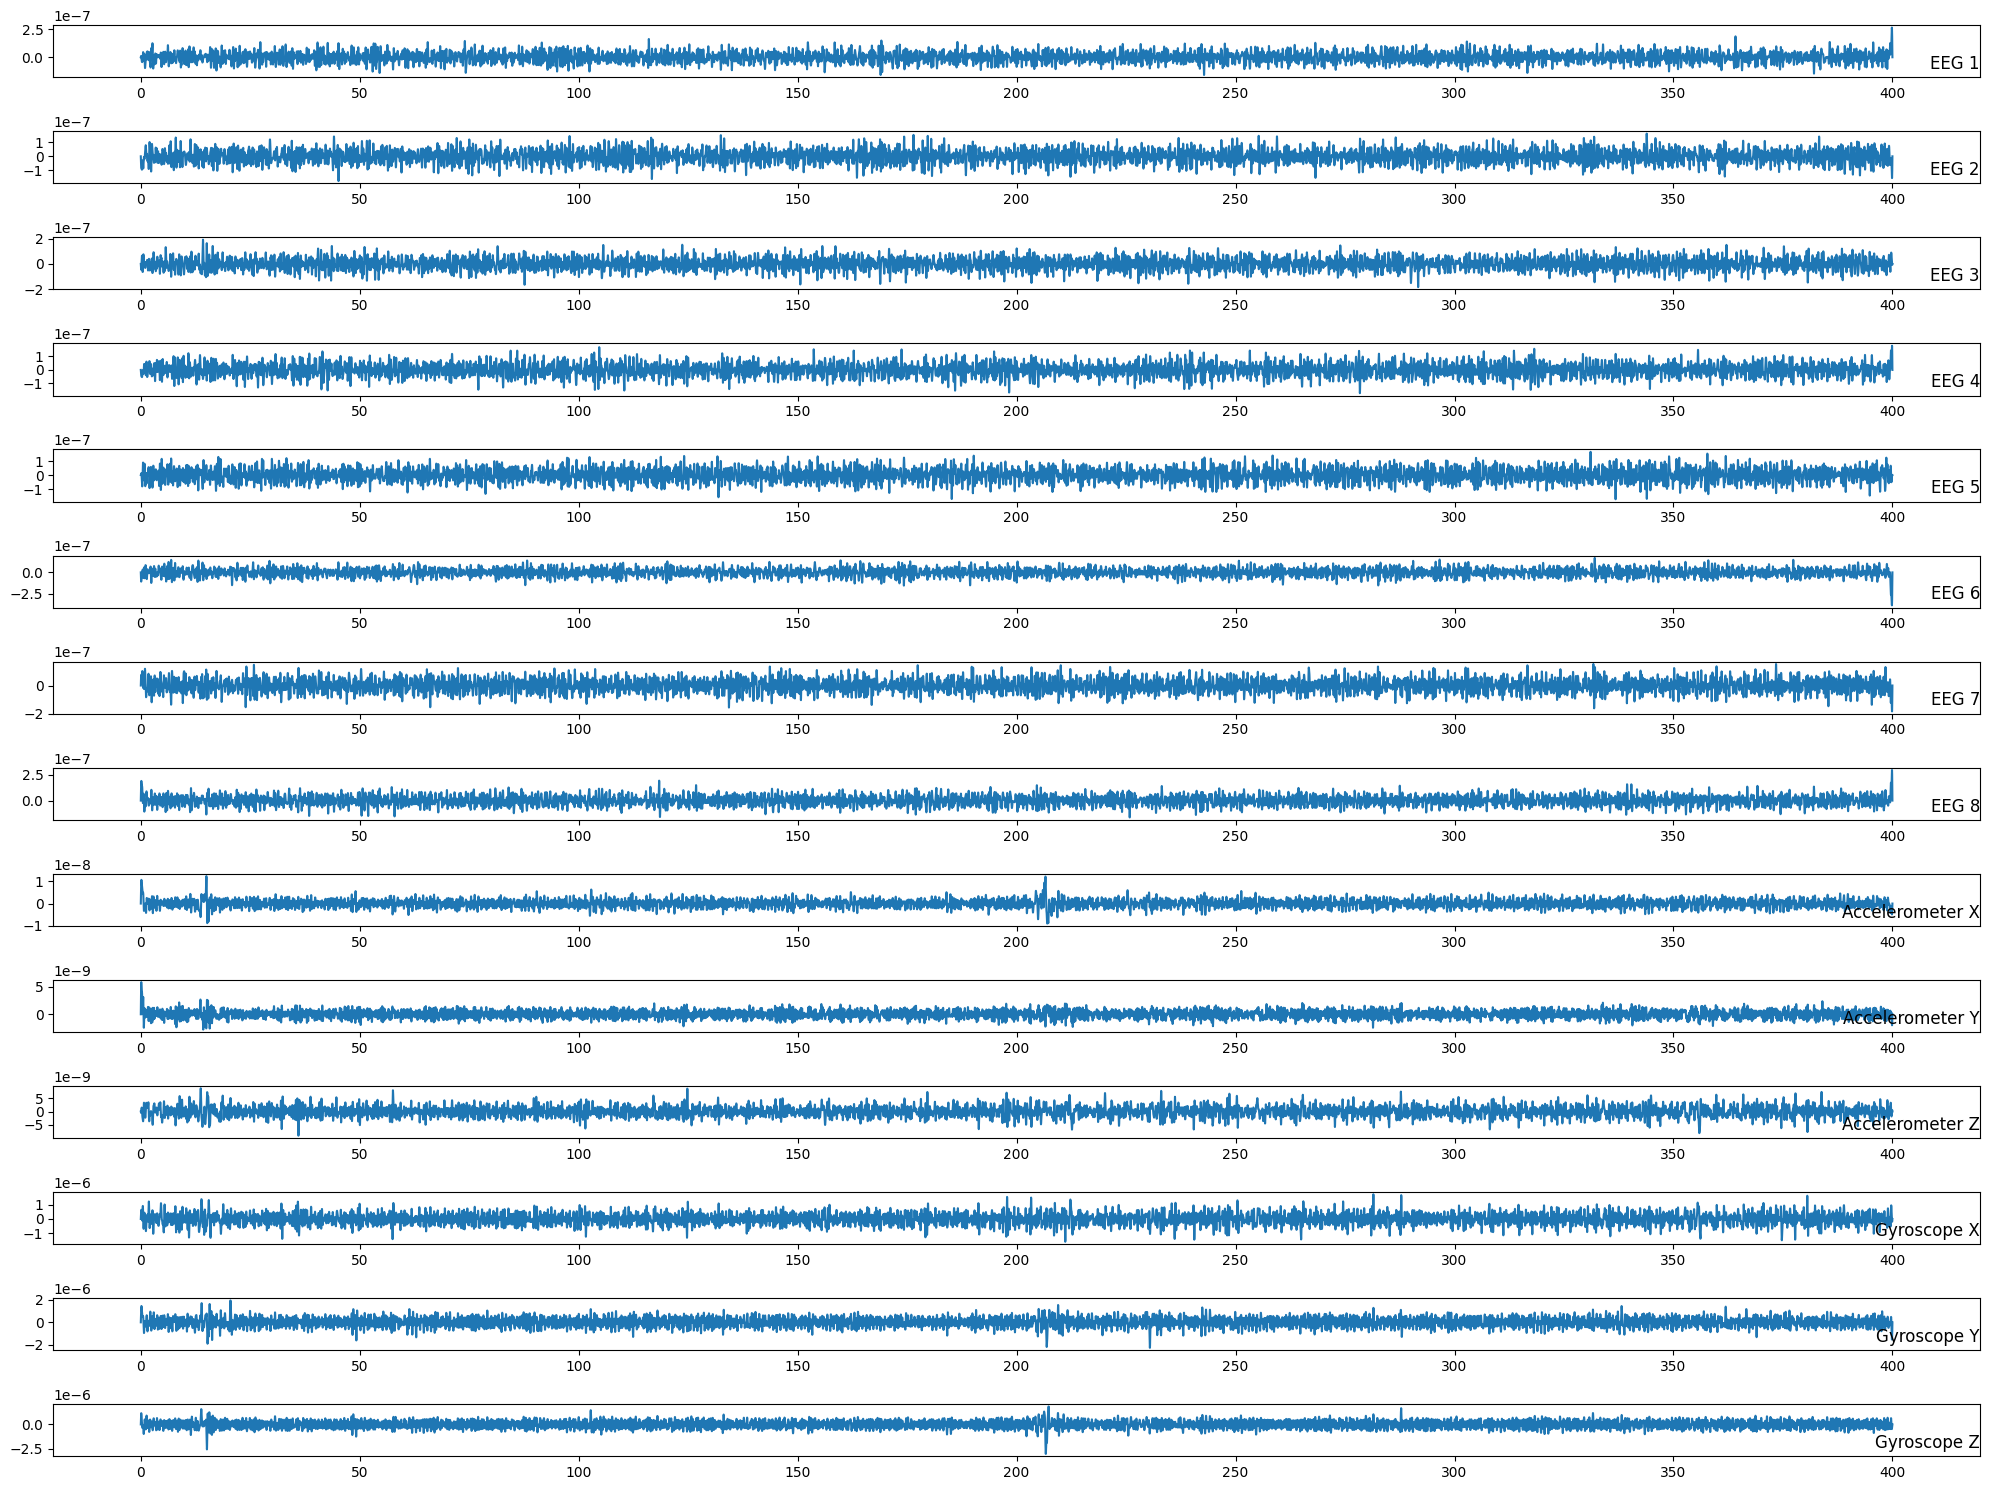

In [10]:
plot_data(raw_clean_df)

In [11]:
raw_clean_df

EEG 1         EEG 2         EEG 3         EEG 4         EEG 5  \
0.000   -1.573374e-10  1.775601e-10 -3.000881e-11 -9.647107e-11  1.985480e-11   
0.004    9.793896e-10 -4.875132e-09 -2.946578e-09 -2.280963e-09  4.266057e-10   
0.008    2.121291e-09 -9.919429e-09 -5.839071e-09 -4.494272e-09  8.443071e-10   
0.012    3.201383e-09 -1.491905e-08 -8.659281e-09 -6.645586e-09  1.295813e-09   
0.016    4.289968e-09 -1.980621e-08 -1.147880e-08 -8.719325e-09  1.741264e-09   
...               ...           ...           ...           ...           ...   
399.980  5.447811e-08 -4.344413e-08 -3.076990e-09  5.099181e-08  8.423635e-10   
399.984  4.097292e-08 -3.276196e-08 -2.336392e-09  3.847559e-08  6.499967e-10   
399.988  2.729562e-08 -2.186118e-08 -1.584972e-09  2.573602e-08  4.628223e-10   
399.992  1.358772e-08 -1.086966e-08 -8.130559e-10  1.286716e-08  2.407742e-10   
399.996 -1.573371e-10  1.775604e-10 -3.000851e-11 -9.647077e-11  1.985510e-11   

                EEG 6         EEG 7         EEG 8  Accelerometer X  \
0.000    3.356912e-10  5.780185e-11 -3.072656e-10    -5.025162e-12   
0.004   -7.677840e-09  5.627467e-09  1.074989e-08     5.610461e-10   
0.008   -1.560427e-08  1.119920e-08  2.169807e-08     1.125030e-09   
0.012   -2.344162e-08  1.665867e-08  3.251846e-08     1.685065e-09   
0.016   -3.114087e-08  2.195583e-08  4.316981e-08     2.239564e-09   
...               ...           ...           ...              ...   
399.980 -8.566250e-08 -5.032241e-08  7.623630e-08    -1.124474e-09   
399.984 -6.442958e-08 -3.794260e-08  5.740406e-08    -8.477978e-10   
399.988 -4.291865e-08 -2.536536e-08  3.825705e-08    -5.683630e-10   
399.992 -2.133351e-08 -1.265503e-08  1.898621e-08    -2.871086e-10   
399.996  3.356915e-10  5.780215e-11 -3.072653e-10    -5.025162e-12   

         Accelerometer Y  Accelerometer Z   Gyroscope X   Gyroscope Y  \
0.000      -3.618167e-12    -7.478866e-13 -5.763203e-10 -1.273315e-10   
0.004       3.767609e-10    -5.442591e-11  3.461662e-08  6.373361e-08   
0.008       7.552461e-10    -1.073026e-10  6.969421e-08  1.274764e-07   
0.012       1.129826e-09    -1.592455e-10  1.045437e-07  1.909777e-07   
0.016       1.498892e-09    -2.092575e-10  1.390523e-07  2.541062e-07   
...                  ...              ...           ...           ...   
399.980    -5.592400e-10     2.168220e-10 -5.587312e-08 -3.666140e-07   
399.984    -4.222910e-10     1.643821e-10 -4.224209e-08 -2.761979e-07   
399.988    -2.837041e-10     1.103553e-10 -2.844641e-08 -1.847385e-07   
399.992    -1.440014e-10     5.544515e-11 -1.452698e-08 -9.262205e-08   
399.996    -3.618167e-12    -7.478866e-13 -5.763203e-10 -1.273315e-10   

          Gyroscope Z  
0.000   -8.328109e-12  
0.004    7.464182e-08  
0.008    1.489621e-07  
0.012    2.226304e-07  
0.016    2.953223e-07  
...               ...  
399.980 -5.010298e-08  
399.984 -3.737629e-08  
399.988 -2.481714e-08  
399.992 -1.238015e-08  
399.996 -8.328109e-12  

[100000 rows x 14 columns]

In [12]:
def detect_multichannel_events(data, threshold, sfreq, min_duration=1.0):
    # Calculer la norme L2 des données sur plusieurs canaux
    combined_data = np.linalg.norm(data, axis=1)

    # Trouver les points au-dessus du seuil
    below_threshold = combined_data < threshold
    event_starts = np.where(np.diff(below_threshold) == 1)[0] + 1
    event_ends = np.where(np.diff(below_threshold) == -1)[0] + 1

    # S'assurer que les événements ont une durée minimale
    min_duration_samples = int(min_duration * sfreq)
    
    # S'assurer que les tableaux ont la même longueur
    if event_starts.size > event_ends.size:
        event_starts = event_starts[:event_ends.size]
    elif event_starts.size < event_ends.size:
        event_ends = event_ends[:event_starts.size]
        
    valid_events = event_ends - event_starts > min_duration_samples

    event_starts = event_starts[valid_events]
    event_ends = event_ends[valid_events]

    # Créer un tableau d'événements MNE-compatible
    events = np.zeros((len(event_starts), 4), dtype=int)
    events[:, 0] = event_starts
    events[:, 1] = 0
    events[:, 2] = 1
    events[:, 3] = 2
    return events

# Utiliser la détection d'événements basée sur un seuil pour plusieurs canaux
channel_names = ["EEG 1", "EEG 2", "EEG 3", "EEG 4", "EEG 5", 
                 "EEG 6", "EEG 7", "EEG 8", "Accelerometer X", "Accelerometer Y", "Accelerometer Z",
                 "Gyroscope X", "Gyroscope Y", "Gyroscope Z"]

# Définir le seuil à 1.6 fois l'amplitude
#threshold = 1.6 #* amplitude

threshold = 0.03e-5  # À ajuster en fonction de vos données
min_duration = 0.2  # Durée minimale d'un événement en secondes

data = raw_clean_df[channel_names].to_numpy()
events = detect_multichannel_events(data, threshold, sfreq, min_duration)
print(events.shape)
if events.size > 0:
    epochs = mne.Epochs(raw_clean, events=events, event_id=1, tmin=-0.5, tmax=2.0, preload=True)
else:
    print("Aucun événement détecté.")

(0, 4)
Aucun événement détecté.


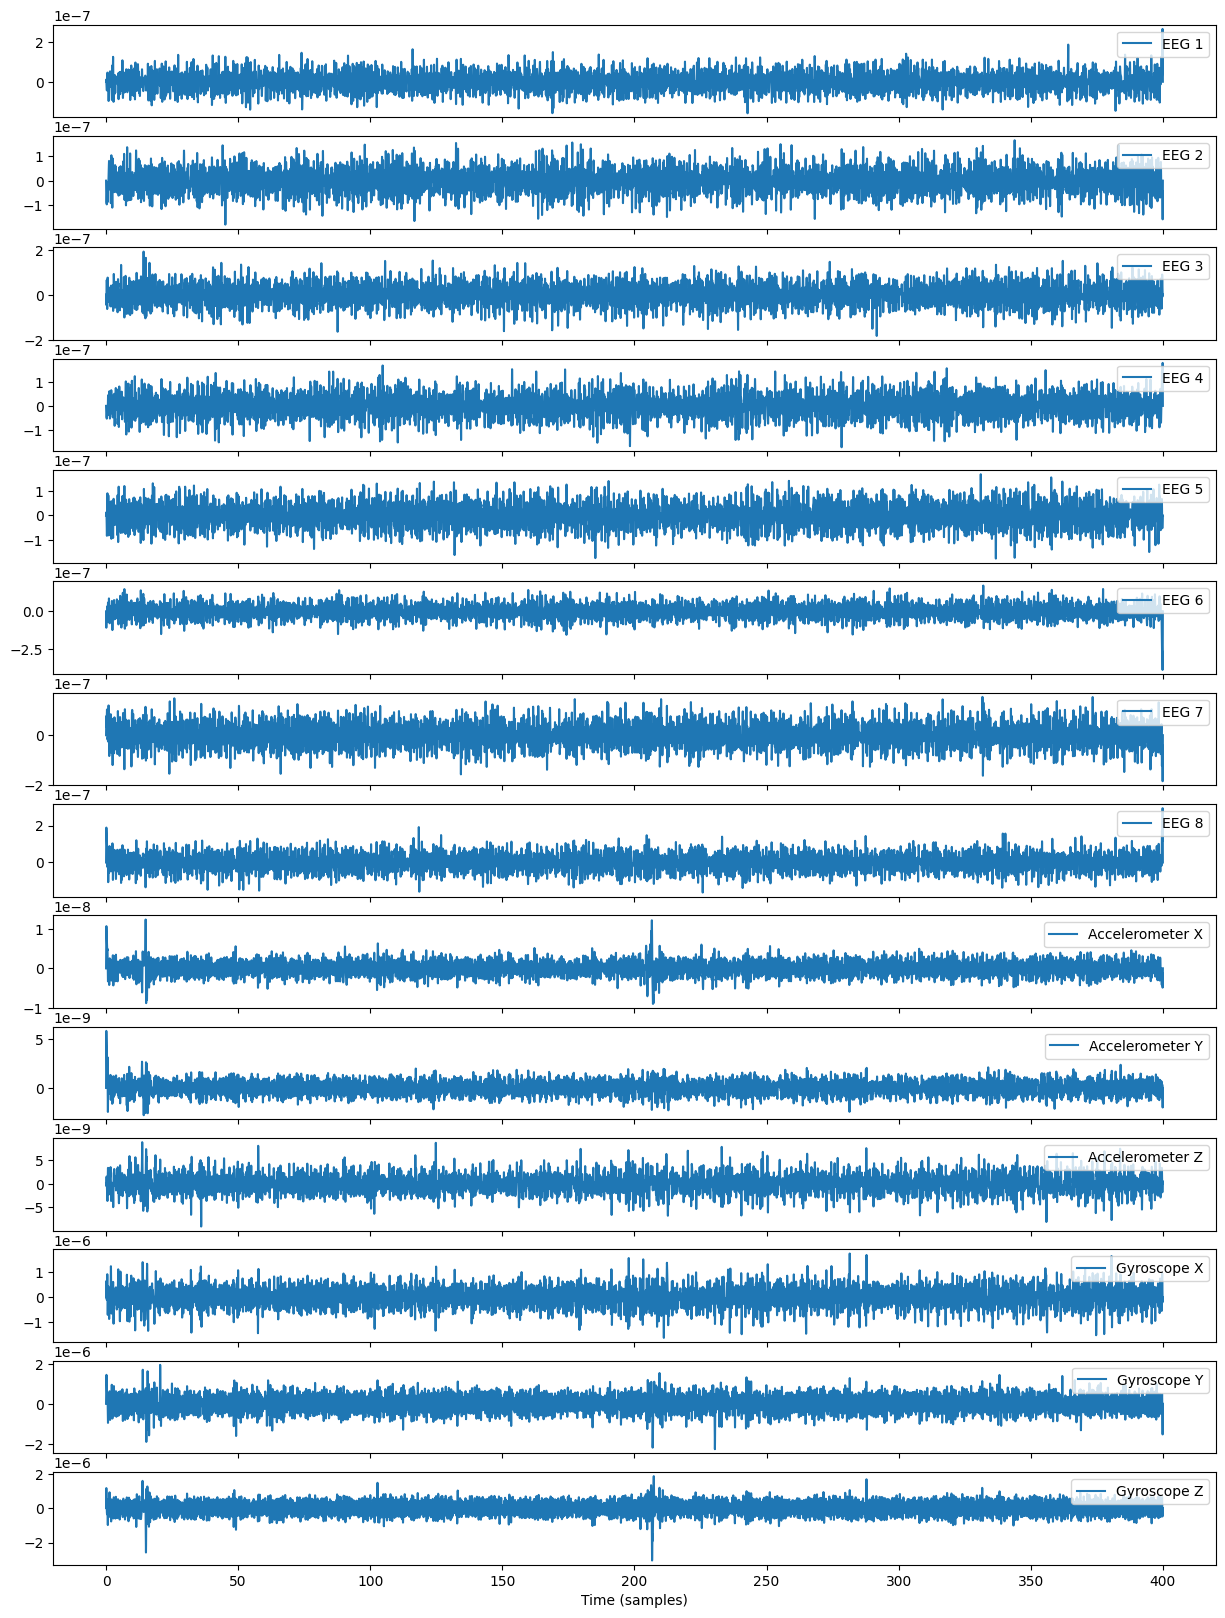

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(len(channel_names), 1, sharex=True, figsize=(15, 20))

for idx, ch_name in enumerate(channel_names):
    ax[idx].plot(raw_clean_df[ch_name], label=ch_name)
    ax[idx].legend(loc='upper right')

plt.xlabel('Time (samples)')
plt.show()

In [16]:
raw_clean_df = raw_clean_df.reset_index(drop=True)
raw_clean_df['index'] = raw_clean_df.index
df3 = df3.reset_index(drop=True)
df3['index'] = df3.index
r = pd.merge(raw_clean_df, df3, on='index')

In [17]:
from matplotlib import pyplot
r.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=pyplot.get_cmap('coolwarm'))

In [18]:
direction_encoder_model = LabelEncoderModel("Direction")
# Enregistrement du modèle
direction_encoder_model.load("direction_process2.joblib")
fdr = direction_encoder_model.transform(r)

In [19]:
fdr

EEG 1         EEG 2         EEG 3         EEG 4         EEG 5  \
0     -1.573374e-10  1.775601e-10 -3.000881e-11 -9.647107e-11  1.985480e-11   
1      9.793896e-10 -4.875132e-09 -2.946578e-09 -2.280963e-09  4.266057e-10   
2      2.121291e-09 -9.919429e-09 -5.839071e-09 -4.494272e-09  8.443071e-10   
3      3.201383e-09 -1.491905e-08 -8.659281e-09 -6.645586e-09  1.295813e-09   
4      4.289968e-09 -1.980621e-08 -1.147880e-08 -8.719325e-09  1.741264e-09   
...             ...           ...           ...           ...           ...   
99995  5.447811e-08 -4.344413e-08 -3.076990e-09  5.099181e-08  8.423635e-10   
99996  4.097292e-08 -3.276196e-08 -2.336392e-09  3.847559e-08  6.499967e-10   
99997  2.729562e-08 -2.186118e-08 -1.584972e-09  2.573602e-08  4.628223e-10   
99998  1.358772e-08 -1.086966e-08 -8.130559e-10  1.286716e-08  2.407742e-10   
99999 -1.573371e-10  1.775604e-10 -3.000851e-11 -9.647077e-11  1.985510e-11   

              EEG 6         EEG 7         EEG 8  Accelerometer X  \
0      3.356912e-10  5.780185e-11 -3.072656e-10    -5.025162e-12   
1     -7.677840e-09  5.627467e-09  1.074989e-08     5.610461e-10   
2     -1.560427e-08  1.119920e-08  2.169807e-08     1.125030e-09   
3     -2.344162e-08  1.665867e-08  3.251846e-08     1.685065e-09   
4     -3.114087e-08  2.195583e-08  4.316981e-08     2.239564e-09   
...             ...           ...           ...              ...   
99995 -8.566250e-08 -5.032241e-08  7.623630e-08    -1.124474e-09   
99996 -6.442958e-08 -3.794260e-08  5.740406e-08    -8.477978e-10   
99997 -4.291865e-08 -2.536536e-08  3.825705e-08    -5.683630e-10   
99998 -2.133351e-08 -1.265503e-08  1.898621e-08    -2.871086e-10   
99999  3.356915e-10  5.780215e-11 -3.072653e-10    -5.025162e-12   

       Accelerometer Y  Accelerometer Z   Gyroscope X   Gyroscope Y  \
0        -3.618167e-12    -7.478866e-13 -5.763203e-10 -1.273315e-10   
1         3.767609e-10    -5.442591e-11  3.461662e-08  6.373361e-08   
2         7.552461e-10    -1.073026e-10  6.969421e-08  1.274764e-07   
3         1.129826e-09    -1.592455e-10  1.045437e-07  1.909777e-07   
4         1.498892e-09    -2.092575e-10  1.390523e-07  2.541062e-07   
...                ...              ...           ...           ...   
99995    -5.592400e-10     2.168220e-10 -5.587312e-08 -3.666140e-07   
99996    -4.222910e-10     1.643821e-10 -4.224209e-08 -2.761979e-07   
99997    -2.837041e-10     1.103553e-10 -2.844641e-08 -1.847385e-07   
99998    -1.440014e-10     5.544515e-11 -1.452698e-08 -9.262205e-08   
99999    -3.618167e-12    -7.478866e-13 -5.763203e-10 -1.273315e-10   

        Gyroscope Z  index  Direction  
0     -8.328109e-12      0          0  
1      7.464182e-08      1          0  
2      1.489621e-07      2          0  
3      2.226304e-07      3          0  
4      2.953223e-07      4          0  
...             ...    ...        ...  
99995 -5.010298e-08  99995          2  
99996 -3.737629e-08  99996          2  
99997 -2.481714e-08  99997          2  
99998 -1.238015e-08  99998          2  
99999 -8.328109e-12  99999          2  

[100000 rows x 16 columns]

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = fdr
# Diviser le DataFrame en sous-ensembles en fonction de la direction
directions = data['Direction'].unique()
direction_dfs = [data[data['Direction'] == d] for d in directions]

# Extraire les colonnes de fréquence
freq_columns = ["EEG 1", "EEG 2", "EEG 3", "EEG 4", "EEG 5", "EEG 6", "EEG 7", "EEG 8",
                 "Accelerometer X","Accelerometer Y", "Accelerometer Z", "Gyroscope X",
                 "Gyroscope Y", "Gyroscope Z"]

# Normaliser les données si nécessaire
scaler = StandardScaler()
data[freq_columns] = scaler.fit_transform(data[freq_columns])

# Appliquer K-means pour chaque direction et ajouter les étiquettes au DataFrame d'origine
n_clusters = 4  # Vous pouvez ajuster le nombre de clusters en fonction de vos besoins
for direction_df in direction_dfs:
    if direction_df.shape[0] >= n_clusters:
        kmeans = KMeans(n_clusters=n_clusters)
    else:
        kmeans = KMeans(n_clusters=1)
    direction_df['Cluster'] = kmeans.fit_predict(direction_df[freq_columns])

# Combine les DataFrames de direction avec les étiquettes de cluster ajoutées
result_df = pd.concat(direction_dfs)

# Combine les DataFrames de direction avec les étiquettes de cluster ajoutées
result_df = pd.concat(direction_dfs)

In [23]:
result_df

EEG 1         EEG 2         EEG 3         EEG 4         EEG 5  \
0     -1.573374e-10  1.775601e-10 -3.000881e-11 -9.647107e-11  1.985480e-11   
1      9.793896e-10 -4.875132e-09 -2.946578e-09 -2.280963e-09  4.266057e-10   
2      2.121291e-09 -9.919429e-09 -5.839071e-09 -4.494272e-09  8.443071e-10   
3      3.201383e-09 -1.491905e-08 -8.659281e-09 -6.645586e-09  1.295813e-09   
4      4.289968e-09 -1.980621e-08 -1.147880e-08 -8.719325e-09  1.741264e-09   
...             ...           ...           ...           ...           ...   
94898 -2.616371e-08 -6.136037e-09 -1.751677e-08 -5.676259e-08  9.910235e-09   
94899 -2.523262e-08 -6.985447e-09 -1.509410e-08 -6.281770e-08  1.125602e-08   
94900 -2.426982e-08 -7.905056e-09 -1.268863e-08 -6.856108e-08  1.253963e-08   
94901 -2.331073e-08 -8.907073e-09 -1.028437e-08 -7.404204e-08  1.372263e-08   
94902 -2.234608e-08 -1.002999e-08 -7.948327e-09 -7.919888e-08  1.484684e-08   

              EEG 6         EEG 7         EEG 8  Accelerometer X  \
0      3.356912e-10  5.780185e-11 -3.072656e-10    -5.025162e-12   
1     -7.677840e-09  5.627467e-09  1.074989e-08     5.610461e-10   
2     -1.560427e-08  1.119920e-08  2.169807e-08     1.125030e-09   
3     -2.344162e-08  1.665867e-08  3.251846e-08     1.685065e-09   
4     -3.114087e-08  2.195583e-08  4.316981e-08     2.239564e-09   
...             ...           ...           ...              ...   
94898  8.545659e-09  3.951087e-08  4.859749e-08     2.014463e-10   
94899  1.126262e-08  3.978473e-08  4.781008e-08     2.823571e-10   
94900  1.404617e-08  3.989861e-08  4.692224e-08     3.641877e-10   
94901  1.691027e-08  3.986400e-08  4.602795e-08     4.471314e-10   
94902  1.973040e-08  3.977074e-08  4.515455e-08     5.312825e-10   

       Accelerometer Y  Accelerometer Z   Gyroscope X   Gyroscope Y  \
0        -3.618167e-12    -7.478866e-13 -5.763203e-10 -1.273315e-10   
1         3.767609e-10    -5.442591e-11  3.461662e-08  6.373361e-08   
2         7.552461e-10    -1.073026e-10  6.969421e-08  1.274764e-07   
3         1.129826e-09    -1.592455e-10  1.045437e-07  1.909777e-07   
4         1.498892e-09    -2.092575e-10  1.390523e-07  2.541062e-07   
...                ...              ...           ...           ...   
94898    -6.485016e-11     1.302088e-09 -3.776465e-07 -1.790878e-08   
94899    -1.276313e-10     1.442994e-09 -3.656453e-07 -2.257776e-08   
94900    -1.921504e-10     1.575902e-09 -3.504538e-07 -2.738876e-08   
94901    -2.574337e-10     1.699613e-09 -3.321413e-07 -3.224929e-08   
94902    -3.233814e-10     1.813342e-09 -3.108004e-07 -3.707094e-08   

        Gyroscope Z  index  Direction  Cluster  
0     -8.328109e-12      0          0        0  
1      7.464182e-08      1          0        2  
2      1.489621e-07      2          0        2  
3      2.226304e-07      3          0        3  
4      2.953223e-07      4          0        3  
...             ...    ...        ...      ...  
94898  3.228731e-07  94898          3        0  
94899  3.307020e-07  94899          3        0  
94900  3.379930e-07  94900          3        0  
94901  3.447714e-07  94901          3        0  
94902  3.510428e-07  94902          3        0  

[100000 rows x 17 columns]

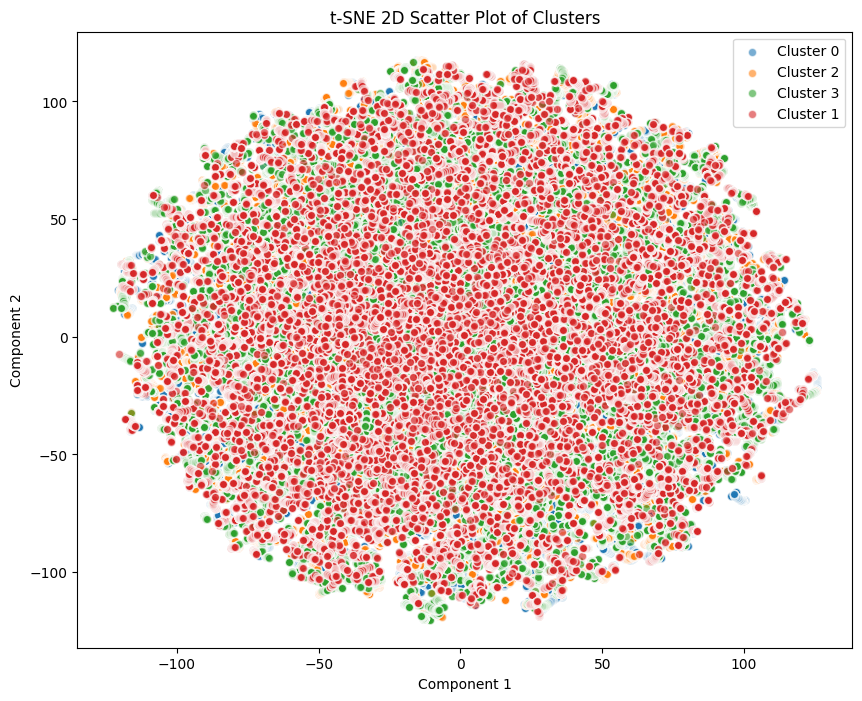

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Réduction de dimensionnalité avec t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_data = tsne.fit_transform(result_df[freq_columns])

# Créer un DataFrame avec les données réduites et les étiquettes de cluster
plot_df = pd.DataFrame(reduced_data, columns=['Component 1', 'Component 2'])
plot_df['Cluster'] = result_df['Cluster']

# Créer un nuage de points pour visualiser les résultats
fig, ax = plt.subplots(figsize=(10, 8))

for cluster in plot_df['Cluster'].unique():
    cluster_data = plot_df[plot_df['Cluster'] == cluster]
    ax.scatter(cluster_data['Component 1'], cluster_data['Component 2'], label=f"Cluster {cluster}", alpha=0.6, edgecolors='w')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_title('t-SNE 2D Scatter Plot of Clusters')
ax.legend()
plt.show()

In [21]:
# Extraire les colonnes de fréquence
freq_columns = ["EEG 1", "EEG 2", "EEG 3", "EEG 4", "EEG 5", "EEG 6", "EEG 7", "EEG 8",
                 "Accelerometer X","Accelerometer Y", "Accelerometer Z", "Gyroscope X",
                 "Gyroscope Y", "Gyroscope Z"]

# Calculer la norme pour chaque ligne (en utilisant seulement les colonnes de fréquence)
norm_data = np.linalg.norm(fdr[freq_columns], axis=1)

# Ajouter la nouvelle colonne 'Norm' au DataFrame
fdr['Norm'] = norm_data

In [22]:
fdr

EEG 1         EEG 2         EEG 3         EEG 4         EEG 5  \
0     -1.573374e-10  1.775601e-10 -3.000881e-11 -9.647107e-11  1.985480e-11   
1      9.793896e-10 -4.875132e-09 -2.946578e-09 -2.280963e-09  4.266057e-10   
2      2.121291e-09 -9.919429e-09 -5.839071e-09 -4.494272e-09  8.443071e-10   
3      3.201383e-09 -1.491905e-08 -8.659281e-09 -6.645586e-09  1.295813e-09   
4      4.289968e-09 -1.980621e-08 -1.147880e-08 -8.719325e-09  1.741264e-09   
...             ...           ...           ...           ...           ...   
99995  5.447811e-08 -4.344413e-08 -3.076990e-09  5.099181e-08  8.423635e-10   
99996  4.097292e-08 -3.276196e-08 -2.336392e-09  3.847559e-08  6.499967e-10   
99997  2.729562e-08 -2.186118e-08 -1.584972e-09  2.573602e-08  4.628223e-10   
99998  1.358772e-08 -1.086966e-08 -8.130559e-10  1.286716e-08  2.407742e-10   
99999 -1.573371e-10  1.775604e-10 -3.000851e-11 -9.647077e-11  1.985510e-11   

              EEG 6         EEG 7         EEG 8  Accelerometer X  \
0      3.356912e-10  5.780185e-11 -3.072656e-10    -5.025162e-12   
1     -7.677840e-09  5.627467e-09  1.074989e-08     5.610461e-10   
2     -1.560427e-08  1.119920e-08  2.169807e-08     1.125030e-09   
3     -2.344162e-08  1.665867e-08  3.251846e-08     1.685065e-09   
4     -3.114087e-08  2.195583e-08  4.316981e-08     2.239564e-09   
...             ...           ...           ...              ...   
99995 -8.566250e-08 -5.032241e-08  7.623630e-08    -1.124474e-09   
99996 -6.442958e-08 -3.794260e-08  5.740406e-08    -8.477978e-10   
99997 -4.291865e-08 -2.536536e-08  3.825705e-08    -5.683630e-10   
99998 -2.133351e-08 -1.265503e-08  1.898621e-08    -2.871086e-10   
99999  3.356915e-10  5.780215e-11 -3.072653e-10    -5.025162e-12   

       Accelerometer Y  Accelerometer Z   Gyroscope X   Gyroscope Y  \
0        -3.618167e-12    -7.478866e-13 -5.763203e-10 -1.273315e-10   
1         3.767609e-10    -5.442591e-11  3.461662e-08  6.373361e-08   
2         7.552461e-10    -1.073026e-10  6.969421e-08  1.274764e-07   
3         1.129826e-09    -1.592455e-10  1.045437e-07  1.909777e-07   
4         1.498892e-09    -2.092575e-10  1.390523e-07  2.541062e-07   
...                ...              ...           ...           ...   
99995    -5.592400e-10     2.168220e-10 -5.587312e-08 -3.666140e-07   
99996    -4.222910e-10     1.643821e-10 -4.224209e-08 -2.761979e-07   
99997    -2.837041e-10     1.103553e-10 -2.844641e-08 -1.847385e-07   
99998    -1.440014e-10     5.544515e-11 -1.452698e-08 -9.262205e-08   
99999    -3.618167e-12    -7.478866e-13 -5.763203e-10 -1.273315e-10   

        Gyroscope Z  index  Direction          Norm  
0     -8.328109e-12      0          0  7.910705e-10  
1      7.464182e-08      1          0  1.052479e-07  
2      1.489621e-07      2          0  2.104678e-07  
3      2.226304e-07      3          0  3.149737e-07  
4      2.953223e-07      4          0  4.184077e-07  
...             ...    ...        ...           ...  
99995 -5.010298e-08  99995          2  4.039648e-07  
99996 -3.737629e-08  99996          2  3.042893e-07  
99997 -2.481714e-08  99997          2  2.034474e-07  
99998 -1.238015e-08  99998          2  1.019218e-07  
99999 -8.328109e-12  99999          2  7.910705e-10  

[100000 rows x 17 columns]

In [23]:
from matplotlib import pyplot
fdr.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=pyplot.get_cmap('coolwarm'))

In [24]:
eg_preprocessor1 = EEGDataPreprocessor_ica(fdr)
processed_data11 = eg_preprocessor1.process_eeg_data_ica()

In [25]:
processed_data11.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=pyplot.get_cmap('coolwarm'))

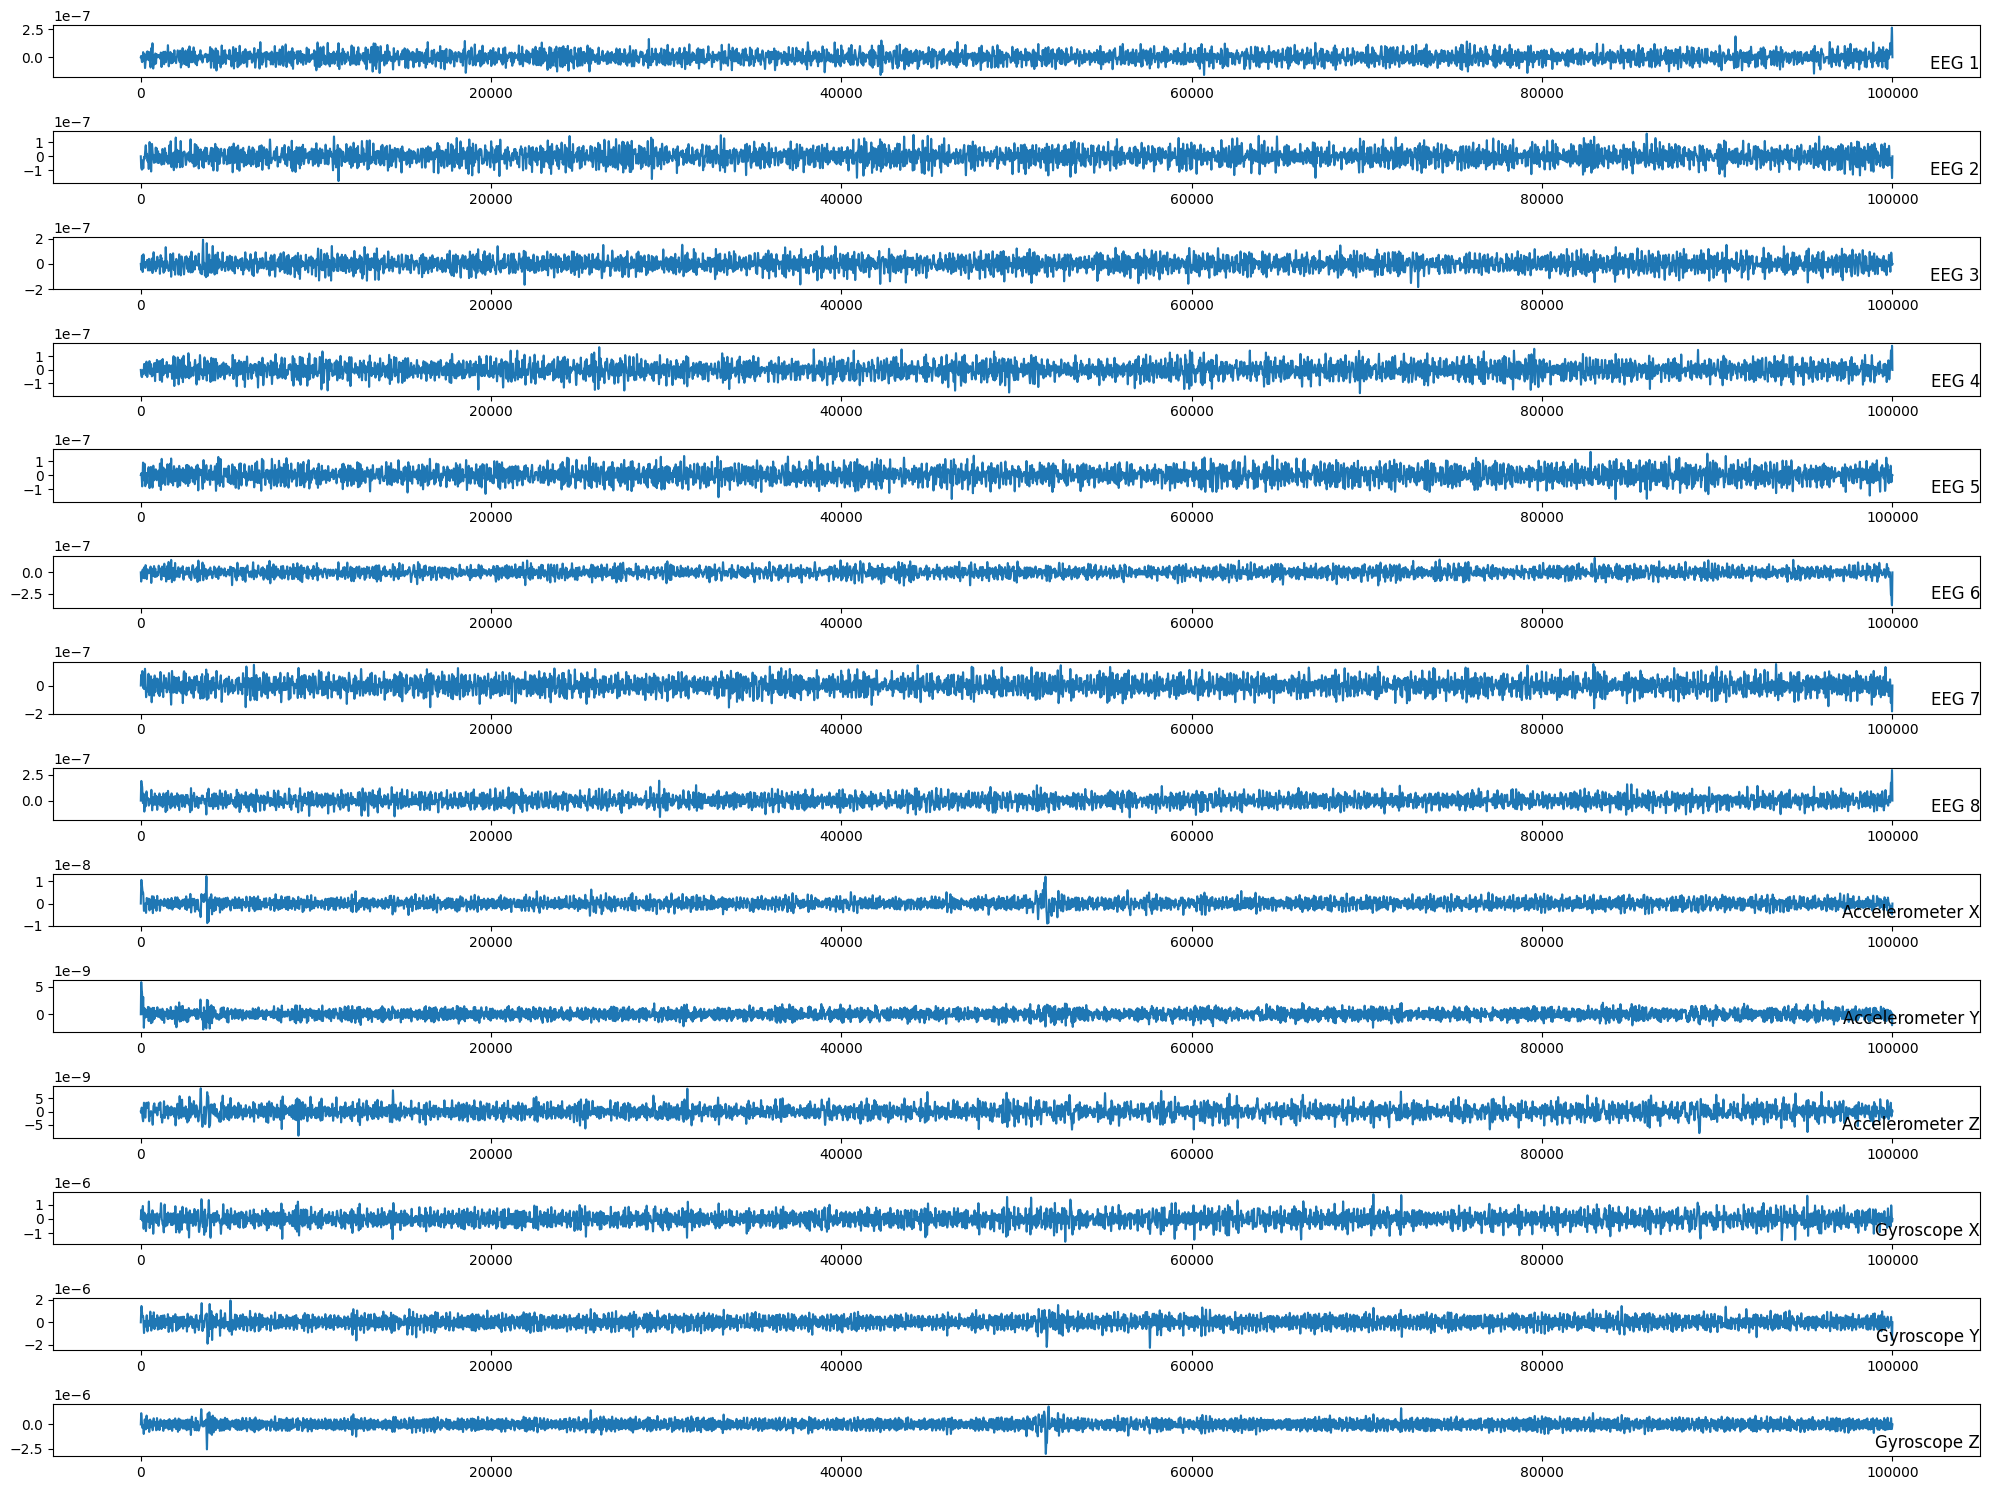

In [80]:
plot_data(processed_data11)

In [27]:
processed_data11

EEG 1         EEG 2         EEG 3         EEG 4         EEG 5  \
0     -1.573374e-10  1.775601e-10 -3.000881e-11 -9.647107e-11  1.985480e-11   
1      9.793896e-10 -4.875132e-09 -2.946578e-09 -2.280963e-09  4.266057e-10   
2      2.121291e-09 -9.919429e-09 -5.839071e-09 -4.494272e-09  8.443071e-10   
3      3.201383e-09 -1.491905e-08 -8.659281e-09 -6.645586e-09  1.295813e-09   
4      4.289968e-09 -1.980621e-08 -1.147880e-08 -8.719325e-09  1.741264e-09   
...             ...           ...           ...           ...           ...   
99995  5.447811e-08 -4.344413e-08 -3.076990e-09  5.099181e-08  8.423635e-10   
99996  4.097292e-08 -3.276196e-08 -2.336392e-09  3.847559e-08  6.499967e-10   
99997  2.729562e-08 -2.186118e-08 -1.584972e-09  2.573602e-08  4.628223e-10   
99998  1.358772e-08 -1.086966e-08 -8.130559e-10  1.286716e-08  2.407742e-10   
99999 -1.573371e-10  1.775604e-10 -3.000851e-11 -9.647077e-11  1.985510e-11   

              EEG 6         EEG 7         EEG 8  Accelerometer X  \
0      3.356912e-10  5.780185e-11 -3.072656e-10    -5.025162e-12   
1     -7.677840e-09  5.627467e-09  1.074989e-08     5.610461e-10   
2     -1.560427e-08  1.119920e-08  2.169807e-08     1.125030e-09   
3     -2.344162e-08  1.665867e-08  3.251846e-08     1.685065e-09   
4     -3.114087e-08  2.195583e-08  4.316981e-08     2.239564e-09   
...             ...           ...           ...              ...   
99995 -8.566250e-08 -5.032241e-08  7.623630e-08    -1.124474e-09   
99996 -6.442958e-08 -3.794260e-08  5.740406e-08    -8.477978e-10   
99997 -4.291865e-08 -2.536536e-08  3.825705e-08    -5.683630e-10   
99998 -2.133351e-08 -1.265503e-08  1.898621e-08    -2.871086e-10   
99999  3.356915e-10  5.780215e-11 -3.072653e-10    -5.025162e-12   

       Accelerometer Y  ...  think_Accelerometer Z  \
0        -3.618167e-12  ...                    1.0   
1         3.767609e-10  ...                    1.0   
2         7.552461e-10  ...                    1.0   
3         1.129826e-09  ...                    1.0   
4         1.498892e-09  ...                    1.0   
...                ...  ...                    ...   
99995    -5.592400e-10  ...                    0.0   
99996    -4.222910e-10  ...                    0.0   
99997    -2.837041e-10  ...                    0.0   
99998    -1.440014e-10  ...                    0.0   
99999    -3.618167e-12  ...                    0.0   

       ICA_component_Accelerometer Z_1  think_Gyroscope X  \
0                            -0.010391                1.0   
1                            -0.008596                1.0   
2                            -0.006827                1.0   
3                            -0.005090                1.0   
4                            -0.003417                1.0   
...                                ...                ...   
99995                        -0.008855                0.0   
99996                        -0.007586                0.0   
99997                        -0.006279                0.0   
99998                        -0.004950                0.0   
99999                        -0.003590                0.0   

       ICA_component_Gyroscope X_1  think_Gyroscope Y  \
0                        -0.035418                1.0   
1                        -0.029859                1.0   
2                        -0.024319                1.0   
3                        -0.018814                1.0   
4                        -0.013363                1.0   
...                            ...                ...   
99995                    -0.007542                0.0   
99996                    -0.006015                0.0   
99997                    -0.004470                0.0   
99998                    -0.002911                0.0   
99999                    -0.001348                0.0   

       ICA_component_Gyroscope Y_1  think_Gyroscope Z  \
0                        -0.032233                1.0   
1                        -0.026160                1.0   
2         

In [28]:
from typing import List, Union
def split_variadic_sequences(
	data: pd.DataFrame, sequence_column: str, boundaries_column: str = None, *,
	begin_iter: int = 0, max_iter: int = -1, keep_index: bool = True, show_debug: bool = False, show_error: bool = True) \
		-> Union[List[pd.DataFrame], None]:

	"""
	Splits a pandas Dataframe into multiple segments,
	where sequence_column changes and keeps them in bounds of boundaries_column
	when set (There's some few extra paramaters, mostly used for debugging)

	PARAMETERS
	----------
	data: `DataFrame`
		Original dataframe to convert
	sequence_column: `str`
		Name of the column to determine where to split sequences
	boundaries_column: `str` | `None`
		Name of the column to determine the boundaries_column of sequences

	OPTIONS
	-------
	begin_iter: `int`
		Where to start in the original dataframe
	max_iter: `int`
		Where to stop in the original dataframe (-1 for all)
	keep_index: `bool`
		Whether or not it should keep the original index in the output
	show_debug: `bool`
		Whether or not it should print debugging messages
	show_error: `bool`
		Whether or not it should print error messages

	RETURN
	------
	Upon success,
		Returns a list of structured DataFrame (`list[pandas.DataFrame]`).
	Upon failure,
		Returns `NONE`. (May occurs when `data` argument is invalid or provided columns names does not exists)
	"""

	# ####################### #
	#   UTILITIES FUNCTIONS   #
	# ####################### #

	def error(msg: str) -> None:
		if show_error:
			print(f"\033[31m\n{msg}\033[0m")

	def debug(msg: str) -> None:
		if show_debug:
			print(f"\033[2m{msg}\033[0m")

	def display(index: int) -> None:
		if boundaries_column:
			debug(f"data[{index}] => {data.iloc[index][sequence_column]} & {data.iloc[index][boundaries_column]} | current_var = {current_var}")
		else:
			debug(f"data[{index}] => {data.iloc[index][sequence_column]}")

	def store(frame: pd.DataFrame) -> pd.DataFrame:
		if type(frame) == pd.DataFrame and len(frame) > 0:
			debug(f"Appending saved tempororary frame")
			output_frames.append(frame)
		return pd.DataFrame(columns=data.columns)

	# ###################### #
	#   CHECK FOR VALIDITY   #
	# ###################### #

	if type(data) != pd.DataFrame:
		return error(f"Given data structure is not a valid DataFrame!\nGiven: {type(data)}")
	if not sequence_column:
		return error("No sequence_column column were given! Impossible to split without it!")
	if not sequence_column in data.columns:
		return error(f"Given sequence_column column does not exists in the given DataFrame!\nGiven: {sequence_column}")
	if boundaries_column and not boundaries_column in data.columns:
		return error(f"Given boundaries_column column does not exists in the given DataFrame!\nGiven: {boundaries_column}")

	if max_iter < 0 or max_iter > len(data):
		max_iter = len(data)
	if begin_iter < 0:
		begin_iter = 0

	# ##################### #
	#   PREPARING STORAGE   #
	# ##################### #

	index: int = begin_iter
	gap_index: int = 0
	current_var = None
	allowed: list[int] = [0, 1]

	output_frames: list[pd.DataFrame] = []
	frame = pd.DataFrame(columns=data.columns)

	debug(f"Convertion begin!")
	while index < max_iter:

		# ##################### #
		#   GET BEGIN SECTION   #
		# ##################### #

		if boundaries_column:
			current_var = data.iloc[index][boundaries_column]
		while index < max_iter and data.iloc[index][sequence_column] == 0 \
			and (not boundaries_column or (boundaries_column and data.iloc[index][boundaries_column] == current_var)):
			display(index)
			frame = pd.concat([frame, data.iloc[index].to_frame().T], ignore_index=not keep_index)
			index += 1
		frame = store(frame)

		# ###################### #
		#   GET MIDDLE SECTION   #
		# ###################### #

		gap_index = index
		while index < max_iter and (not boundaries_column \
			or (boundaries_column and data.iloc[index][boundaries_column] == current_var)):
			display(index)
			if data.iloc[index][sequence_column] not in allowed:
				return error(f"It must contains only one the following: {allowed}.\nFound: {data.iloc[index][sequence_column]} at position {index}.")
			if data.iloc[index][sequence_column] == 1:
				index += 1
				while gap_index < index:
					frame = pd.concat([frame, data.iloc[gap_index].to_frame().T], ignore_index=not keep_index)
					gap_index += 1
			else:
				index += 1
		frame = store(frame)

		# ##################### #
		#   GET FINAL SECTION   #
		# ##################### #

		index = gap_index
		while index < max_iter and (not boundaries_column \
			or (boundaries_column and data.iloc[index][boundaries_column] == current_var)):
			display(index)
			frame = pd.concat([frame, data.iloc[index].to_frame().T], ignore_index=not keep_index)
			index += 1

	# #################### #
	#   FINALIZE OUTPUTS   #
	# #################### #

	frame = store(frame)
	debug(f"Convertion complete!")
	return output_frames

In [29]:
out = split_variadic_sequences(processed_data11, "think_Norm", "Direction", keep_index=True)

In [30]:
print("Nombre de dataframes :", len(out))

Nombre de dataframes : 268


In [61]:
def extract_features(eeg_data):
    mean = np.mean(eeg_data)
    std = np.std(eeg_data)
    min_value = np.min(eeg_data)
    max_value = np.max(eeg_data)
    
    return {
        'mean': mean,
        'std': std,
        'min': min_value,
        'max': max_value
    }

def process_dataframes(dataframes):
    all_features = []

    for df in dataframes:
        eeg_columns = ['EEG 1', 'EEG 2', 'EEG 3', 'EEG 4', 'EEG 5', 'EEG 6', 'EEG 7', 'EEG 8',
       'Accelerometer X', 'Accelerometer Y', 'Accelerometer Z', 'Gyroscope X',
       'Gyroscope Y', 'Gyroscope Z', 'Norm',
       'think_EEG 1', 'ICA_component_EEG 1_1', 'think_EEG 2',
       'ICA_component_EEG 2_1', 'think_EEG 3', 'ICA_component_EEG 3_1',
       'think_EEG 4', 'ICA_component_EEG 4_1', 'think_EEG 5',
       'ICA_component_EEG 5_1', 'think_EEG 6', 'ICA_component_EEG 6_1',
       'think_EEG 7', 'ICA_component_EEG 7_1', 'think_EEG 8',
       'ICA_component_EEG 8_1', 'think_Accelerometer X',
       'ICA_component_Accelerometer X_1', 'think_Accelerometer Y',
       'ICA_component_Accelerometer Y_1', 'think_Accelerometer Z',
       'ICA_component_Accelerometer Z_1', 'think_Gyroscope X',
       'ICA_component_Gyroscope X_1', 'think_Gyroscope Y',
       'ICA_component_Gyroscope Y_1', 'think_Gyroscope Z',
       'ICA_component_Gyroscope Z_1', 'think_Norm', 'ICA_component_Norm_1']

        row_features = {}
        for column in eeg_columns:
            eeg_data = df[column]
            channel_features = extract_features(eeg_data)
            row_features.update({f"{column}_{key}": value for key, value in channel_features.items()})

        think_norm = df['think_Norm'].iloc[0]
        if think_norm == 1:
            direction = df['Direction'].iloc[0]
        else:
            direction = 5

        row_features['Direction'] = direction
        all_features.append(row_features)

    result = pd.DataFrame(all_features)
    return result

In [62]:
result = process_dataframes(out)

In [63]:
result

EEG 1_mean     EEG 1_std     EEG 1_min     EEG 1_max    EEG 2_mean  \
0   -1.899227e-08  2.145938e-08 -4.392645e-08  1.073469e-08 -7.681116e-08   
1   -9.227452e-09  3.839366e-08 -9.697795e-08  4.585063e-08 -3.155502e-08   
2    8.076579e-09  3.855782e-08 -9.536676e-08  5.227582e-08 -1.353409e-10   
3   -3.541025e-09  5.161084e-08 -1.012860e-07  1.253755e-07  7.129574e-09   
4   -1.109274e-09  3.062008e-08 -8.785378e-08  4.181532e-08 -6.408210e-09   
..            ...           ...           ...           ...           ...   
263 -1.218934e-09  4.181934e-08 -9.041609e-08  7.896275e-08  2.263807e-09   
264  7.153845e-09  5.225103e-08 -9.140103e-08  1.328216e-07 -1.334822e-08   
265 -2.645229e-09  3.871352e-08 -8.117041e-08  8.676906e-08  6.382126e-09   
266 -5.384721e-09  5.276464e-08 -9.114614e-08  9.027197e-08  3.257804e-09   
267  5.609979e-08  8.472027e-08 -1.048944e-07  2.659307e-07 -2.544138e-08   

        EEG 2_std     EEG 2_min     EEG 2_max    EEG 3_mean     EEG 3_std  \
0    2.308631e-08 -9.563385e-08  1.775601e-10  5.329113e-09  3.971226e-08   
1    2.918616e-08 -8.680603e-08  2.246030e-08  3.094279e-09  3.764553e-08   
2    4.529465e-08 -9.086362e-08  8.005451e-08  9.404498e-10  2.614863e-08   
3    4.723888e-08 -1.088863e-07  1.028828e-07 -2.856414e-09  4.180694e-08   
4    3.110293e-08 -6.022288e-08  5.329748e-08  6.180836e-09  3.550344e-08   
..            ...           ...           ...           ...           ...   
263  4.164877e-08 -9.498418e-08  8.987522e-08 -9.055396e-09  4.994571e-08   
264  5.658792e-08 -1.102710e-07  8.358056e-08  1.239262e-08  4.466827e-08   
265  4.344272e-08 -7.153288e-08  9.425377e-08 -3.859739e-09  3.693485e-08   
266  4.916825e-08 -8.291960e-08  9.257890e-08  6.268105e-09  3.201988e-08   
267  5.468711e-08 -1.562074e-07  7.596397e-08  6.155959e-09  4.528096e-08   

     ...  ICA_component_Gyroscope Z_1_max  think_Norm_mean  think_Norm_std  \
0    ...                         0.039707              1.0             0.0   
1    ...                         0.114296              0.0             0.0   
2    ...                         0.086357              1.0             0.0   
3    ...                         0.061761              0.0             0.0   
4    ...                         0.056728              1.0             0.0   
..   ...                              ...              ...             ...   
263  ...                         0.069848              0.0             0.0   
264  ...                         0.088400              1.0             0.0   
265  ...                         0.057222              0.0             0.0   
266  ...                         0.063884              1.0             0.0   
267  ...                         0.057427              0.0             0.0   

     think_Norm_min  think_Norm_max  ICA_component_Norm_1_mean  \
0               1.0             1.0                   0.041682   
1               0.0             0.0                  -0.022144   
2               1.0             1.0                  -0.009676   
3               0.0             0.0                   0.004539   
4               1.0             1.0                  -0.004845   
..              ...             ...                        ...   
263             0.0             0.0                   0.001691   
264             1.0             1.0                  -0.002614   
265             0.0             0.0                   0.001712   
266             1.0             1.0                   0.012443   
267             0.0             0.0                  -0.008811   

     ICA_component_Norm_1_std  ICA_component_Norm_1_min  \
0                    0.078173                 -0.156381   
1                    0.039877                 -0.093892   
2                    0.041240                 -0.092360   
3                    0.033671                 -0.058223   
4                    0.038515                 -0.097078   
..                        ...                       ...   
263           

In [64]:
result.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=pyplot.get_cmap('coolwarm'))

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Séparez les caractéristiques et les labels
X = result.drop("Direction", axis=1)
#X = result[["think_EEG 5_mean", "think_Gyroscope Y_mean", "think_Gyroscope Z_mean", "think_Accelerometer Z_mean", "think_Gyroscope X_mean"]]
y = result["Direction"]

In [69]:
X.columns

Index(['EEG 1_mean', 'EEG 1_std', 'EEG 1_min', 'EEG 1_max', 'EEG 2_mean',
       'EEG 2_std', 'EEG 2_min', 'EEG 2_max', 'EEG 3_mean', 'EEG 3_std',
       ...
       'ICA_component_Gyroscope Z_1_min', 'ICA_component_Gyroscope Z_1_max',
       'think_Norm_mean', 'think_Norm_std', 'think_Norm_min', 'think_Norm_max',
       'ICA_component_Norm_1_mean', 'ICA_component_Norm_1_std',
       'ICA_component_Norm_1_min', 'ICA_component_Norm_1_max'],
      dtype='object', length=180)

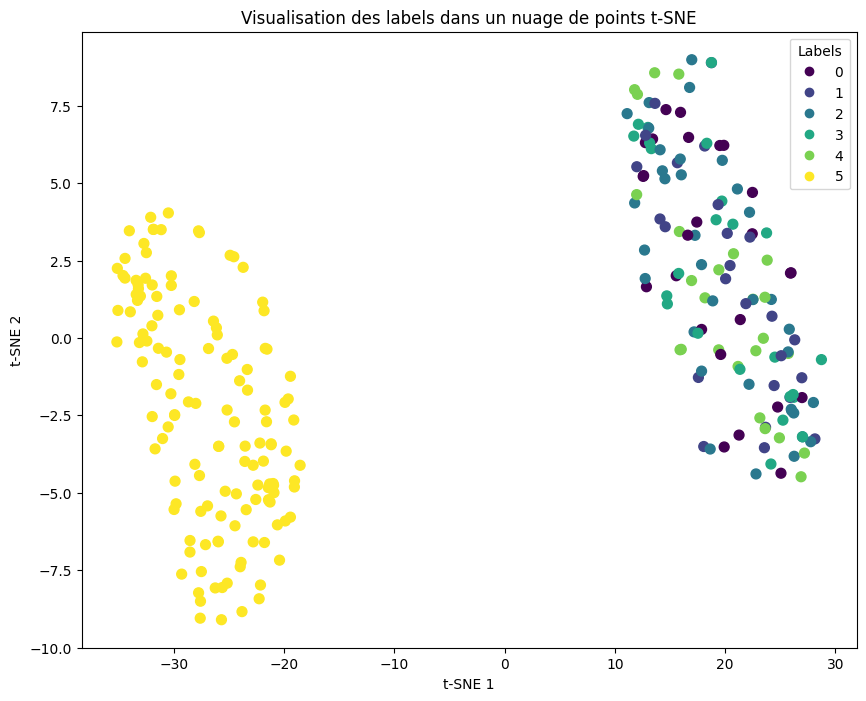

In [70]:
# Normalisez les données
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Appliquez t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualisez le nuage de points avec des couleurs différentes pour chaque label
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=50)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("Visualisation des labels dans un nuage de points t-SNE")
plt.legend(*scatter.legend_elements(), title="Labels")
plt.show()

In [71]:
from sklearn.ensemble import RandomForestClassifier
# Initialiser le modèle Random Forest
rf_model = RandomForestClassifier()

# Adapter le modèle sur les données
rf_model.fit(X, y)

# Obtenir l'importance des variables
importances = rf_model.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

for index in sorted_indices:
    print(f"{X.columns[index]}: {importances[index]}")

think_Norm_max: 0.04595013651648425
think_EEG 6_mean: 0.03621282892772837
think_Norm_min: 0.03592247937673168
think_Gyroscope Y_mean: 0.03522795257126934
think_EEG 1_mean: 0.03447637063080727
think_EEG 7_mean: 0.02992100298936553
think_EEG 4_mean: 0.025663023092765525
think_Accelerometer X_mean: 0.025414055879897614
think_EEG 3_mean: 0.024149618893329512
think_Accelerometer Z_mean: 0.02327185013111016
think_EEG 8_mean: 0.0230131645175087
think_Accelerometer Y_mean: 0.022971864542670677
think_Gyroscope Z_mean: 0.01958629343857331
think_EEG 5_mean: 0.018792845938572444
think_Gyroscope X_mean: 0.017278618731816485
think_Norm_mean: 0.015174833144571982
ICA_component_Norm_1_max: 0.01282765545706526
think_Gyroscope Z_max: 0.011601225851136602
think_Gyroscope Z_std: 0.011562908230727326
ICA_component_Accelerometer Y_1_min: 0.010112899724596842
ICA_component_EEG 4_1_mean: 0.010005301698597601
ICA_component_Gyroscope X_1_max: 0.009811817114681725
ICA_component_EEG 3_1_max: 0.009739231366065746


In [72]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from matplotlib import pyplot
from numpy import where

# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({5.0: 134, 2.0: 35, 0.0: 25, 1.0: 25, 4.0: 25, 3.0: 24})
Counter({3.0: 138, 5.0: 134, 2.0: 134, 0.0: 130, 1.0: 129, 4.0: 125})


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
print("x_train_seq shape:", X_train.shape)
print("y_train_seq shape:", y_train.shape)
print("x_test_seq shape:", X_test.shape)
print("y_test_seq shape:", y_test.shape)

x_train_seq shape: (632, 180)
y_train_seq shape: (632,)
x_test_seq shape: (158, 180)
y_test_seq shape: (158,)


In [75]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [76]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9746835443037974


In [78]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [79]:
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.979 (0.019)


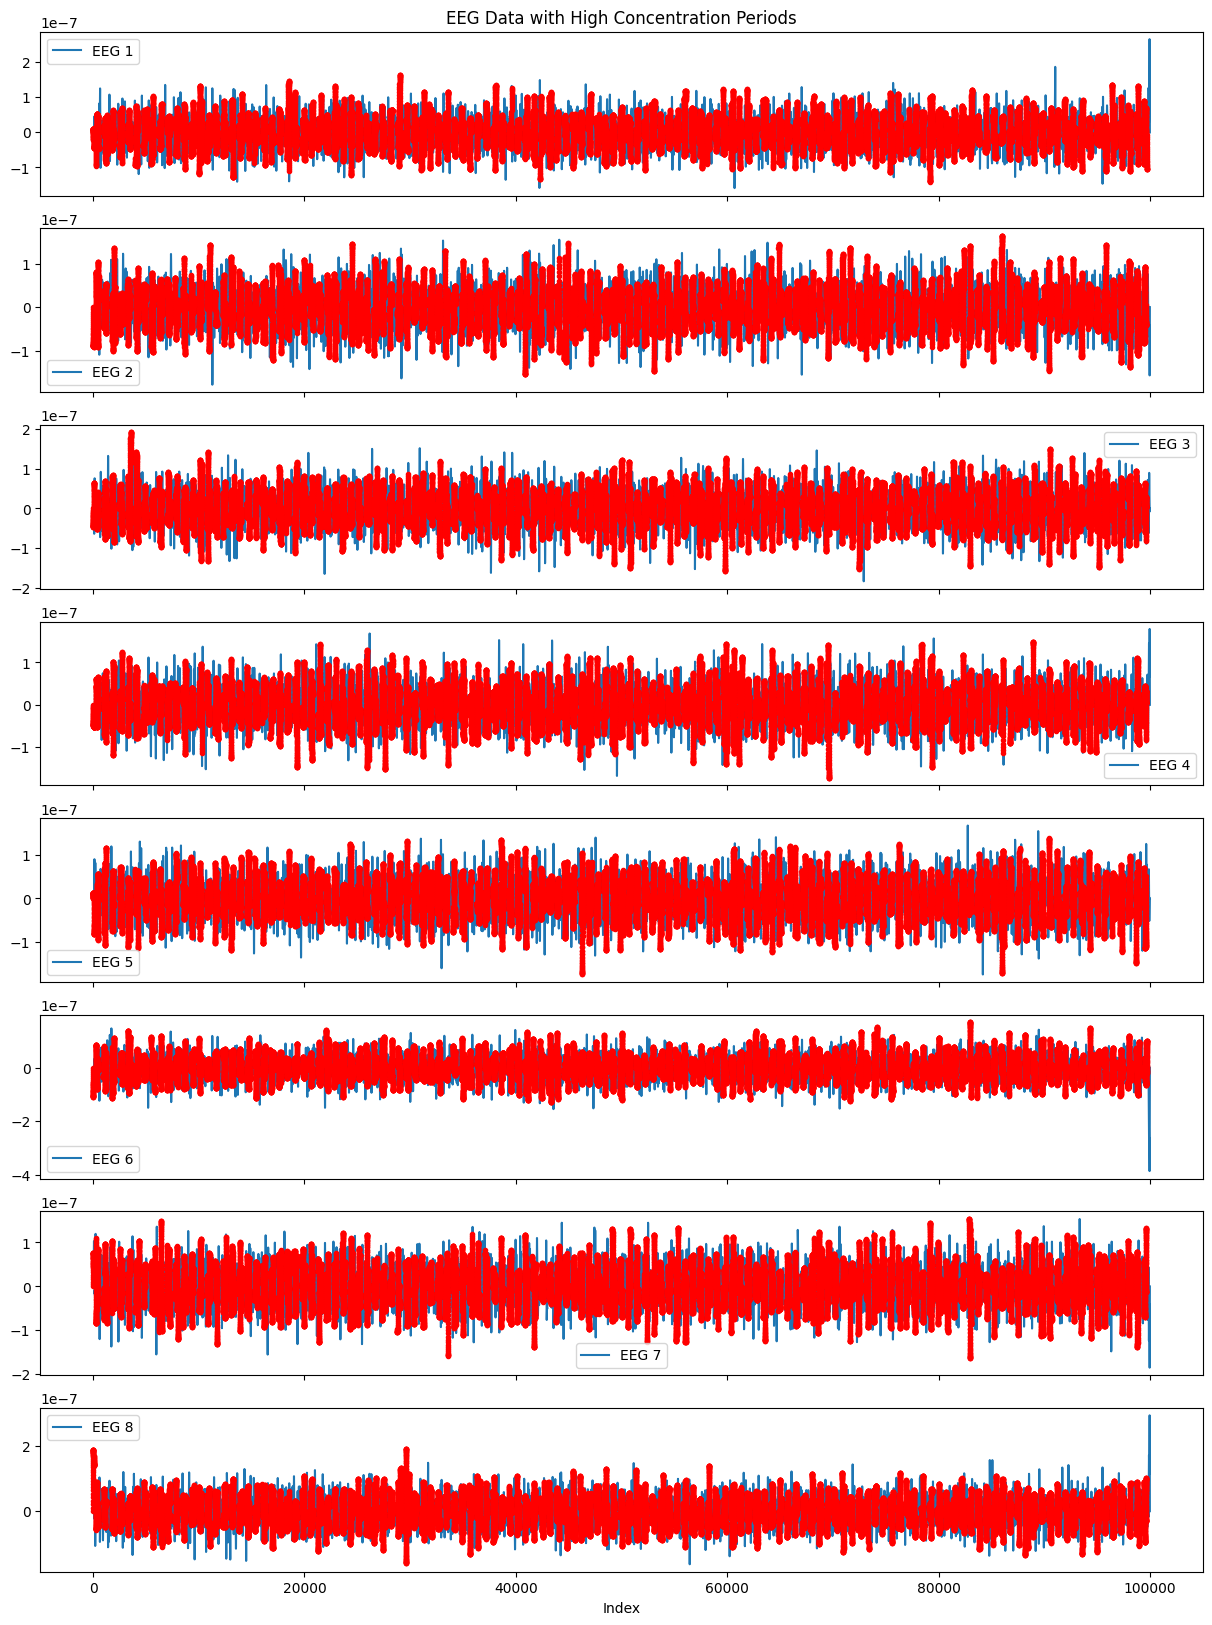

In [45]:
import matplotlib.pyplot as plt

df = processed_data11

# Créez une figure et un ensemble de sous-tracés pour les données EEG
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(15, 20), sharex=True)
for i in range(1, 9):
    channel_name = f"EEG {i}"
    think_channel_name = f"think_{channel_name}"
    
    # Tracez les données EEG
    axes[i-1].plot(df.index, df[channel_name], label=channel_name)
    
    # Tracez les cibles en rouge
    targets = df.index[df[think_channel_name] == 1]
    axes[i-1].plot(targets, df.loc[targets, channel_name], "ro", markersize=3)
    
    # Ajoutez une légende
    axes[i-1].legend()

# Configurez les étiquettes et titres des axes
axes[-1].set_xlabel('Index')
axes[0].set_title('EEG Data with High Concentration Periods')

# Affichez la figure
plt.show()

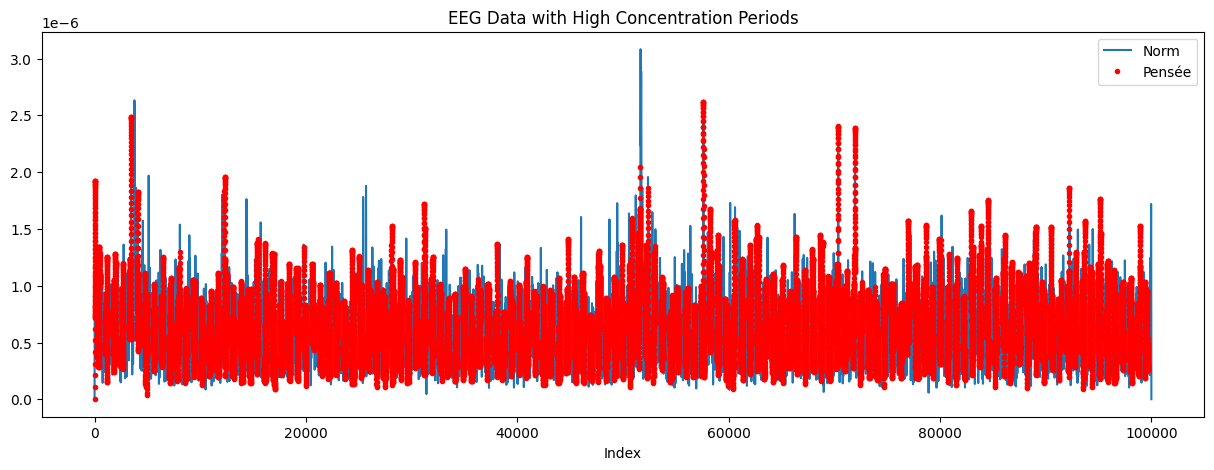

In [46]:
import matplotlib.pyplot as plt

df = processed_data11 # Remplacez "data" par le nom de votre DataFrame contenant la colonne "Norm"

# Créez une figure et un ensemble de sous-tracés pour les données EEG
fig, ax = plt.subplots(figsize=(15, 5))

# Tracez les données de "Norm"
ax.plot(df.index, df['Norm'], label='Norm')

# Tracez les débuts de pensée en rouge
think_column_name = 'think_Norm'  # Remplacez 'think' par le nom de la colonne indiquant le début de la pensée
targets = df.index[df[think_column_name] == 1]
ax.plot(targets, df.loc[targets, 'Norm'], "ro", markersize=3, label='Pensée')

# Ajoutez une légende
ax.legend()

# Configurez les étiquettes et titres des axes
ax.set_xlabel('Index')
ax.set_title('EEG Data with High Concentration Periods')

# Affichez la figure
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Calcul des poids de classes
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight = "balanced", classes= classes, y= y_train)
class_weights = {i: w for i, w in enumerate(class_weights)}

# Entraînement du modèle
model.fit(X_train, y_train, epochs=400, batch_size=30, validation_data=(X_val, y_val), shuffle=True, class_weight=class_weights)

In [ ]:
import pandas as pd


data = processed_data11

# Séparer les données en X (caractéristiques) et y (cible)
X = data.drop(['Direction','index','Soft_DTW_Cluster'], axis=1)
y = data['Direction']

# Initialiser le modèle Random Forest
rf_model = RandomForestClassifier()

# Adapter le modèle sur les données
rf_model.fit(X, y)

# Obtenir l'importance des variables
importances = rf_model.feature_importances_

# Afficher les scores d'importance pour chaque variable
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance}')

In [ ]:
# Oversample and plot imbalanced dataset with ADASYN
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = ADASYN()
#X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
scaler = StandardScaler()
X_ = scaler.fit_transform(X,y)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit

# Charger les données dans un dataframe
data = processed_data11

# Définir la variable cible et les variables d'entrée
target = 'Direction'
features = ['EEG 1', 'EEG 2', 'EEG 3', 'EEG 4', 'EEG 5', 'EEG 6', 'EEG 7', 'EEG 8',
       'Accelerometer X', 'Accelerometer Y', 'Accelerometer Z', 'Gyroscope X',
       'Gyroscope Y', 'Gyroscope Z', 'Norm', 'think_EEG 1',
       'ICA_component_EEG 1_1', 'think_EEG 2', 'ICA_component_EEG 2_1',
       'think_EEG 3', 'ICA_component_EEG 3_1', 'think_EEG 4',
       'ICA_component_EEG 4_1', 'think_EEG 5', 'ICA_component_EEG 5_1',
       'think_EEG 6', 'ICA_component_EEG 6_1', 'think_EEG 7',
       'ICA_component_EEG 7_1', 'think_EEG 8', 'ICA_component_EEG 8_1',
       'think_Accelerometer X', 'ICA_component_Accelerometer X_1',
       'think_Accelerometer Y', 'ICA_component_Accelerometer Y_1',
       'think_Accelerometer Z', 'ICA_component_Accelerometer Z_1',
       'think_Gyroscope X', 'ICA_component_Gyroscope X_1', 'think_Gyroscope Y',
       'ICA_component_Gyroscope Y_1', 'think_Gyroscope Z',
       'ICA_component_Gyroscope Z_1','think_Norm', 'ICA_component_Norm_1']

# Diviser les données en ensembles d'entraînement et de test en fonction du temps
tscv = TimeSeriesSplit(n_splits=3)
for train_index, test_index in tscv.split(data):
    train_data = data.iloc[train_index]
    test_data = data.iloc[test_index]

    # Séparer les données d'entraînement et de test en X (caractéristiques) et y (cible)
    X_train = train_data[features]
    y_train = train_data[target]
    X_test = test_data[features]
    y_test = test_data[target]

    # Initialiser le modèle Random Forest
    rf_model = RandomForestClassifier(n_estimators=100)

    # Adapter le modèle sur les données d'entraînement
    rf_model.fit(X_train, y_train)

    # Prédire les valeurs pour les données de test
    y_pred = rf_model.predict(X_test)
    print(f'y_test : {y_test}')
    print(f'y_pred : {y_pred}')

    # Calculer la précision de prédiction
    accuracy = (y_pred == y_test).mean()
    print(f'Accuracy : {accuracy}')

In [ ]:
# Séparation en données d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X_, y, test_size=0.2)

In [ ]:
y_val

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_val)

In [ ]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

In [ ]:
def detect_frequency_changes_df(data, channel_name, sfreq, nperseg=256, noverlap=None):
    channel_data = data[channel_name]
    
    if noverlap is None:
        noverlap = nperseg // 2

    frequencies, times, Zxx = stft(channel_data, fs=sfreq, nperseg=nperseg, noverlap=noverlap)
    transformed_signal = np.abs(Zxx)  # Appliquez ici la transformation de votre choix

    return times, transformed_signal

In [ ]:
from scipy import signal
import numpy as np
from scipy.signal import stft, periodogram

def process_eeg_data_stft_high_concentration(data, sfreq, channel_names, nperseg=256, noverlap=None):
    for channel_name in channel_names:
        target = np.zeros(len(data))
        i = 0
        while i < len(data) - 1:
            window_start = i
            direction = data.iloc[i]["Direction"]
            i += 1
            while i < len(data) and data.iloc[i]["Direction"] == direction:
                i += 1
            window_end = i
            window = data.iloc[window_start:window_end]

            # Utilisez detect_frequency_changes_df pour obtenir le signal transformé
            _, transformed_signal = detect_frequency_changes_df(window, channel_name, sfreq, nperseg, noverlap)

            # Calculez la fréquence de pensée dominante et sélectionnez le signal associé
            frequencies, powers = signal.periodogram(transformed_signal, axis=0)
            max_power = np.max(powers[frequencies < 15], axis=0)
            source_index = np.argmax(max_power)
            source_selected = transformed_signal[source_index]

            # Calculez la moyenne et l'écart-type du signal sélectionné
            source_mean = np.mean(source_selected)
            source_std = np.std(source_selected)

            # Marquez les périodes de forte concentration
            source_low_concentration = source_selected[(source_selected < source_mean + source_std/2) &
                                                           (source_selected > source_mean - source_std/2)]
            target[window_start:window_end][np.where(source_low_concentration != 0)[0]] = 1

        # Ajoutez les données transformées en tant que nouvelle colonne dans le DataFrame
        data[f"think1_{channel_name}"] = target

    return data

In [ ]:
# Utilisation de la fonction
channel_names = ["EEG 1", "EEG 2", "EEG 3", "EEG 4", "EEG 5", "EEG 6", "EEG 7", "EEG 8", "Accelerometer X", "Accelerometer Y", "Accelerometer Z", "Gyroscope X", "Gyroscope Y", "Gyroscope Z"]
raw_clean_df_with_think_high_concentration = process_eeg_data_stft_high_concentration(fdr, sfreq, channel_names)

In [ ]:
import matplotlib.pyplot as plt

df = raw_clean_df_with_think_high_concentration

# Créez une figure et un ensemble de sous-tracés pour les données EEG
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(15, 20), sharex=True)
for i in range(1, 9):
    channel_name = f"EEG {i}"
    think_channel_name = f"think1_{channel_name}"
    
    # Tracez les données EEG
    axes[i-1].plot(df.index, df[channel_name], label=channel_name)
    
    # Tracez les cibles en rouge
    targets = df.index[df[think_channel_name] == 1]
    axes[i-1].plot(targets, df.loc[targets, channel_name], "ro", markersize=3)
    
    # Ajoutez une légende
    axes[i-1].legend()

# Configurez les étiquettes et titres des axes
axes[-1].set_xlabel('Index')
axes[0].set_title('EEG Data with High Concentration Periods')

# Affichez la figure
plt.show()

In [ ]:
from PyEMD import EMD

def empirical_mode_decomposition(data, channel_name):
    channel_data = data[channel_name].to_numpy()  # Convertir les données en tableau NumPy
    emd = EMD()
    imfs = emd(channel_data)
    return imfs

def apply_emd_to_all_channels(data, channel_prefix='EEG'):
    imfs_dict = {}
    for column in data.columns:
        if column.startswith(channel_prefix):
            #print(f"Applying EMD to column: {column}")
            imfs = empirical_mode_decomposition(data, column)
            num_imfs = imfs.shape[0]
            for i in range(num_imfs):
                new_column_name = f"{column}_IMF{i+1}"
                data[new_column_name] = imfs[i]
                imfs_dict[new_column_name] = imfs[i]
    return data

imfs_dict = apply_emd_to_all_channels(raw_clean_df_with_think_high_concentration)

In [ ]:
df = imfs_dict[["EEG 1", "EEG 2", "EEG 3", "EEG 4", "EEG 5", 
               "EEG 6", "EEG 7", "EEG 8", "Accelerometer X","Accelerometer Y", "Accelerometer Z",
               "Gyroscope X","Gyroscope Y", "Gyroscope Z", "Direction"]]

In [ ]:
import time
import logging

# Configurez le logger pour écrire dans un fichier de log
logging.basicConfig(filename='example.log', level=logging.ERROR)

def process_dataframe(df):
    start_time = time.time()
    fdr2 = None
    fdr = None
    #try:
        #df = df[df["Validation Indicator"] != 0]
    #except Exception as e:
        #print(f"An error occurred while filtering the dataframe: {e}")
    
    try:
        df2 = df[['EEG 1', 'EEG 2', 'EEG 3', 'EEG 4', 'EEG 5', 'EEG 6', 'EEG 7', 'EEG 8',
           'Accelerometer X', 'Accelerometer Y', 'Accelerometer Z', 'Gyroscope X',
           'Gyroscope Y', 'Gyroscope Z']]
    except Exception as e:
        print(f"An error occurred while selecting columns in the dataframe: {e}")
    
    try:
        data_preprocessor1 = EEGDataPreprocessor1(df)
        processed_data1 = data_preprocessor1.preprocess_data()
    except Exception as e:
        print(f"An error occurred while running EEGDataPreprocessor1: {e}")
        
    try:
        eg_preprocessor1 = EEGDataPreprocessor_ica(processed_data1)
        processed_data11 = eg_preprocessor1.process_eeg_data_ica()
    except Exception as e:
        print(f"An error occurred while running EEGDataPreprocessor_ica: {e}")
        
    try:
        pca_handler = PCAHandler(n_components=7)
        pca_handler.fit(df2)
        df_pca = pca_handler.transform(df2)
        pca_handler.save('pca_model3.pkl')
    except Exception as e:
        print(f"An error occurred while fitting the PCAHandler: {e}")
        
    try:
        pca_handler = PCAHandler()
        pca_handler.load('pca_model.pkl')
    except Exception as e:
        print(f"An error occurred while loading the PCAHandler: {e}")
    
    try:
        df_pca = df_pca.reset_index(drop=True)
        df_pca['index'] = df_pca.index 
        ol = pd.merge(processed_data11,df_pca, on='index')
        #print(ol.columns)
    except Exception as e:
        print(f"An error occurred while merging dataframes: {e}")

    try:
        fdr = ol[['EEG 1', 'EEG 2', 'EEG 3', 'EEG 4', 'EEG 5', 'EEG 6', 'EEG 7', 'EEG 8',
       'Accelerometer X', 'Accelerometer Y', 'Accelerometer Z', 'Gyroscope X',
       'Gyroscope Y', 'Gyroscope Z', 'Direction', 'think_EEG 1', 'index',
       'ICA_component_EEG 1_1', 'think_EEG 2', 'ICA_component_EEG 2_1',
       'think_EEG 3', 'ICA_component_EEG 3_1', 'think_EEG 4',
       'ICA_component_EEG 4_1', 'think_EEG 5', 'ICA_component_EEG 5_1',
       'think_EEG 6', 'ICA_component_EEG 6_1', 'think_EEG 7',
       'ICA_component_EEG 7_1', 'think_EEG 8', 'ICA_component_EEG 8_1',
       'think_Accelerometer X', 'ICA_component_Accelerometer X_1',
       'think_Accelerometer Y', 'ICA_component_Accelerometer Y_1',
       'think_Accelerometer Z', 'ICA_component_Accelerometer Z_1',
       'think_Gyroscope X', 'ICA_component_Gyroscope X_1', 'think_Gyroscope Y',
       'ICA_component_Gyroscope Y_1', 'think_Gyroscope Z',
       'ICA_component_Gyroscope Z_1', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
       'PC7']]
    except Exception as e:
        print(f"final df error: {e}")
    
    print("--- %s seconds ---" % (time.time() - start_time))
    return fdr

In [ ]:
result = process_dataframe(df)

In [ ]:
import matplotlib.pyplot as plt

df = result

# Plot the EEG data
for i in range(1, 9):
    plt.plot(df.index, df["EEG {}".format(i)], label="EEG {}".format(i))

# Plot the targets in red
targets = df.index[df["think"] == 1]
plt.plot(targets, df.loc[targets, "EEG 1"], "ro", markersize=3)

plt.legend()
plt.show()

In [ ]:
df

In [ ]:
processor = HajjProcessor(df)

# Traiter les données
processed_data = (processor
                  .filter_by_validation_indicator()
                  .select_columns()
                  .process_eeg_data()
                  .reset_index()
                  .select_direction_column()
                  .merge_dataframes(processor.df_direction)
                  .apply_label_encoder_model()  # Retirer le nom du fichier
                  .process_eeg_data_stft_high_concentration()
                  .apply_emd_to_all_channels()
                  .get_dataframe())

# Afficher les données traitées
print(processed_data)

In [ ]:
def plot_data(df):
    columns = ["EEG 1", "EEG 2", "EEG 3", "EEG 4", "EEG 5", 
               "EEG 6", "EEG 7", "EEG 8", "Accelerometer X","Accelerometer Y", "Accelerometer Z",
               "Gyroscope X","Gyroscope Y", "Gyroscope Z"]
    plt.figure(figsize=(20, 15))
    for i, column in enumerate(columns):
        plt.subplot(len(columns), 1, i+1)
        plt.plot(df[column])
        plt.title(column, y=0, loc='right')
    plt.tight_layout()
    plt.show()

In [ ]:
plot_data(processed_data)

In [ ]:
from matplotlib import pyplot
processed_data.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=pyplot.get_cmap('coolwarm'))
# Cf. https://matplotlib.org/examples/color/colormaps_reference.html pour les codes couleurs

In [ ]:
import time
import logging

# Configurez le logger pour écrire dans un fichier de log
logging.basicConfig(filename='example.log', level=logging.ERROR)

def process_dataframe(df):
    start_time = time.time()
    fdr2 = None
    fdr = None
    #try:
        #df = df[df["Validation Indicator"] != 0]
    #except Exception as e:
        #print(f"An error occurred while filtering the dataframe: {e}")
    
    try:
        df2 = df[['EEG 1', 'EEG 2', 'EEG 3', 'EEG 4', 'EEG 5', 'EEG 6', 'EEG 7', 'EEG 8',
           'Accelerometer X', 'Accelerometer Y', 'Accelerometer Z', 'Gyroscope X',
           'Gyroscope Y', 'Gyroscope Z']]
    except Exception as e:
        print(f"An error occurred while selecting columns in the dataframe: {e}")
    
    try:
        data_preprocessor1 = EEGDataPreprocessor1(df)
        processed_data1 = data_preprocessor1.preprocess_data()
    except Exception as e:
        print(f"An error occurred while running EEGDataPreprocessor1: {e}")
        
    try:
        eg_preprocessor1 = EEGDataPreprocessor_ica(processed_data1)
        processed_data11 = eg_preprocessor1.process_eeg_data_ica()
    except Exception as e:
        print(f"An error occurred while running EEGDataPreprocessor_ica: {e}")
        
    try:
        pca_handler = PCAHandler(n_components=7)
        pca_handler.fit(df2)
        df_pca = pca_handler.transform(df2)
        pca_handler.save('pca_model3.pkl')
    except Exception as e:
        print(f"An error occurred while fitting the PCAHandler: {e}")
        
    try:
        pca_handler = PCAHandler()
        pca_handler.load('pca_model.pkl')
    except Exception as e:
        print(f"An error occurred while loading the PCAHandler: {e}")
    
    try:
        df_pca = df_pca.reset_index(drop=True)
        df_pca['index'] = df_pca.index 
        ol = pd.merge(processed_data11,df_pca, on='index')
        #print(ol)
        print(ol.columns)
    except Exception as e:
        print(f"An error occurred while merging dataframes: {e}")

    try:
        fdr = ol[['EEG 1', 'EEG 2', 'EEG 3', 'EEG 4', 'EEG 5', 'EEG 6', 'EEG 7', 'EEG 8',
       'Accelerometer X', 'Accelerometer Y', 'Accelerometer Z', 'Gyroscope X',
       'Gyroscope Y', 'Gyroscope Z', 'index', 'Direction', 'think1_EEG 1',
       'think1_EEG 2', 'think1_EEG 3', 'think1_EEG 4', 'think1_EEG 5',
       'think1_EEG 6', 'think1_EEG 7', 'think1_EEG 8',
       'think1_Accelerometer X', 'think1_Accelerometer Y',
       'think1_Accelerometer Z', 'think1_Gyroscope X', 'think1_Gyroscope Y',
       'think1_Gyroscope Z', 'EEG 1_IMF1', 'EEG 1_IMF2', 'EEG 2_IMF1',
       'EEG 2_IMF2', 'EEG 3_IMF1', 'EEG 3_IMF2', 'EEG 4_IMF1', 'EEG 4_IMF2',
       'EEG 5_IMF1', 'EEG 5_IMF2', 'EEG 6_IMF1', 'EEG 6_IMF2', 'EEG 7_IMF1',
       'EEG 7_IMF2', 'EEG 8_IMF1', 'EEG 8_IMF2', 'think_EEG 1',
       'ICA_component_EEG 1_1', 'think_EEG 2', 'ICA_component_EEG 2_1',
       'think_EEG 3', 'ICA_component_EEG 3_1', 'think_EEG 4',
       'ICA_component_EEG 4_1', 'think_EEG 5', 'ICA_component_EEG 5_1',
       'think_EEG 6', 'ICA_component_EEG 6_1', 'think_EEG 7',
       'ICA_component_EEG 7_1', 'think_EEG 8', 'ICA_component_EEG 8_1',
       'think_Accelerometer X', 'ICA_component_Accelerometer X_1',
       'think_Accelerometer Y', 'ICA_component_Accelerometer Y_1',
       'think_Accelerometer Z', 'ICA_component_Accelerometer Z_1',
       'think_Gyroscope X', 'ICA_component_Gyroscope X_1', 'think_Gyroscope Y',
       'ICA_component_Gyroscope Y_1', 'think_Gyroscope Z',
       'ICA_component_Gyroscope Z_1', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
       'PC7']]
    except Exception as e:
        print(f"final df error: {e}")
    
    print("--- %s seconds ---" % (time.time() - start_time))
    return fdr

In [ ]:
result = process_dataframe(processed_data)

In [ ]:
result.Direction.value_counts()

In [ ]:
def plot_data(df):
    columns = ["EEG 1", "EEG 2", "EEG 3", "EEG 4", "EEG 5", 
               "EEG 6", "EEG 7", "EEG 8", "Accelerometer X","Accelerometer Y", "Accelerometer Z",
               "Gyroscope X","Gyroscope Y", "Gyroscope Z"]
    plt.figure(figsize=(20, 15))
    for i, column in enumerate(columns):
        plt.subplot(len(columns), 1, i+1)
        plt.plot(df[column])
        plt.title(column, y=0, loc='right')
    plt.tight_layout()
    plt.show()

In [ ]:
plot_data(result)

In [ ]:
result.columns

In [ ]:
rs = result[['EEG 1', 'EEG 2', 'EEG 3', 'EEG 4', 'EEG 5', 'EEG 6', 'EEG 7', 'EEG 8',
       'Accelerometer X', 'Accelerometer Y', 'Accelerometer Z', 'Gyroscope X',
       'Gyroscope Y', 'Gyroscope Z', 'think1_EEG 1',
       'think1_EEG 2', 'think1_EEG 3', 'think1_EEG 4', 'think1_EEG 5',
       'think1_EEG 6', 'think1_EEG 7', 'think1_EEG 8',
       'think1_Accelerometer X', 'think1_Accelerometer Y',
       'think1_Accelerometer Z', 'think1_Gyroscope X', 'think1_Gyroscope Y',
       'think1_Gyroscope Z']]

In [ ]:
ss = result[['EEG 1', 'EEG 2', 'EEG 3', 'EEG 4', 'EEG 5', 'EEG 6', 'EEG 7', 'EEG 8',
       'Accelerometer X', 'Accelerometer Y', 'Accelerometer Z', 'Gyroscope X',
       'Gyroscope Y', 'Gyroscope Z', 'think_EEG 1', 'think_EEG 2',
       'think_EEG 3','think_EEG 4','think_EEG 5','think_EEG 6','think_EEG 7',
        'think_EEG 8','think_Accelerometer X','think_Accelerometer Y',
       'think_Accelerometer Z','think_Gyroscope X', 'think_Gyroscope Y',
      'think_Gyroscope Z', 'Direction']]

In [ ]:
ss

In [ ]:
import matplotlib.pyplot as plt

df = ss

# Créer une figure plus grande
plt.figure(figsize=(15, 8))

# Récupérer les noms de colonnes contenant "EEG" et "think"
eeg_columns = [col for col in df.columns if "EEG" in col and "think" not in col]
think_columns = [col for col in df.columns if "think" in col and "EEG" in col]

# Tracer les données EEG
for col_name in eeg_columns:
    plt.plot(df.index, df[col_name], label=col_name)

# Tracer les cibles "think" pour chaque colonne EEG en rouge
for col_name in think_columns:
    eeg_number = col_name.split("_")[1]
    eeg_col_name = f"{eeg_number}"
    targets = df.index[df[col_name] == 1]
    plt.plot(targets, df.loc[targets, eeg_col_name], "ro", markersize=3, label=f"{col_name} targets")

plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

df = rs

# Créer une figure plus grande
plt.figure(figsize=(15, 8))

# Récupérer les noms de colonnes contenant "EEG" et "think"
eeg_columns = [col for col in df.columns if "EEG" in col and "think" not in col]
think_columns = [col for col in df.columns if "think" in col and "EEG" in col]

# Tracer les données EEG
for col_name in eeg_columns:
    plt.plot(df.index, df[col_name], label=col_name)

# Tracer les cibles "think" pour chaque colonne EEG en rouge
for col_name in think_columns:
    eeg_number = col_name.split("_")[1]
    eeg_col_name = f"{eeg_number}"
    targets = df.index[df[col_name] == 1]
    plt.plot(targets, df.loc[targets, eeg_col_name], "ro", markersize=3, label=f"{col_name} targets")

plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

df = rs

# Récupérer les noms de colonnes contenant "EEG" et "think"
eeg_columns = [col for col in df.columns if "EEG" in col and "think" not in col]
think_columns = [col for col in df.columns if "think" in col and "EEG" in col]

# Tracer les données EEG
for col_name in eeg_columns:
    plt.plot(df.index, df[col_name], label=col_name)

# Tracer les cibles "think" pour chaque colonne EEG en rouge
for col_name in think_columns:
    eeg_number = col_name.split("_")[1]
    eeg_col_name = f"{eeg_number}"
    targets = df.index[df[col_name] == 1]
    plt.plot(targets, df.loc[targets, eeg_col_name], "ro", markersize=3, label=f"{col_name} targets")

plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = result.corr()

# Visualisez la matrice de corrélation avec Seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("Matrice de corrélation des fréquences EEG")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

df = result

# Créez une figure et un ensemble de sous-tracés pour les données EEG
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(15, 20), sharex=True)
for i in range(1, 9):
    channel_name = f"EEG {i}"
    think_channel_name = f"think_{channel_name}"
    
    # Tracez les données EEG
    axes[i-1].plot(df.index, df[channel_name], label=channel_name)
    
    # Tracez les cibles en rouge
    targets = df.index[df[think_channel_name] == 1]
    axes[i-1].plot(targets, df.loc[targets, channel_name], "ro", markersize=3)
    
    # Ajoutez une légende
    axes[i-1].legend()

# Configurez les étiquettes et titres des axes
axes[-1].set_xlabel('Index')
axes[0].set_title('EEG Data with High Concentration Periods')

# Affichez la figure
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

df = ss

# Créer une figure plus grande
fig, ax = plt.subplots(figsize=(15, 8))

# Récupérer les noms de colonnes contenant "EEG" et "think"
eeg_columns = [col for col in df.columns if "EEG" in col and "think" not in col]
think_columns = [col for col in df.columns if "think" in col and "EEG" in col]

# Initialiser les lignes pour les données EEG et les étiquettes "think"
eeg_lines = [ax.plot([], [], label=col_name)[0] for col_name in eeg_columns]
think_markers = []

# Fonction pour initialiser l'animation
def init():
    for line in eeg_lines:
        line.set_data([], [])
    return eeg_lines

# Fonction pour mettre à jour l'animation
def update(frame):
    # Mettre à jour les données EEG
    for i, col_name in enumerate(eeg_columns):
        eeg_lines[i].set_data(df.index[:frame], df[col_name][:frame])

    # Mettre à jour les cibles "think" pour chaque colonne EEG en rouge
    for col_name in think_columns:
        eeg_number = col_name.split("_")[1]
        eeg_col_name = f"{eeg_number}"
        targets = df.index[df[col_name] == 1]
        targets_to_plot = targets[targets <= frame]
        think_markers.extend(ax.plot(targets_to_plot, df.loc[targets_to_plot, eeg_col_name], "ro", markersize=3, label=f"{col_name} targets" if frame == 0 else ""))

    return eeg_lines + think_markers

# Créer l'animation
ani = animation.FuncAnimation(fig, update, frames=len(df), init_func=init, blit=True, interval=100, repeat=False)

# Afficher la légende et lancer l'animation
ax.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

df = result

# Créez une figure et un ensemble de sous-tracés pour les données EEG
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(15, 20), sharex=True)

# Créer des lignes pour les données EEG et les marqueurs "think"
eeg_lines = []
think_markers = []

for i in range(1, 9):
    channel_name = f"EEG {i}"
    think_channel_name = f"think_{channel_name}"
    
    # Initialiser les lignes pour les données EEG et les marqueurs "think"
    eeg_line, = axes[i-1].plot([], [], label=channel_name)
    eeg_lines.append(eeg_line)

# Fonction pour initialiser l'animation
def init():
    for line in eeg_lines:
        line.set_data([], [])
    return eeg_lines

# Fonction pour mettre à jour l'animation
def update(frame):
    for i in range(1, 9):
        channel_name = f"EEG {i}"
        think_channel_name = f"think_{channel_name}"
        
        # Mettre à jour les données EEG
        eeg_lines[i-1].set_data(df.index[:frame], df[channel_name][:frame])

        # Mettre à jour les cibles "think" en rouge
        targets = df.index[df[think_channel_name] == 1]
        targets_to_plot = targets[targets <= frame]
        think_markers.extend(axes[i-1].plot(targets_to_plot, df.loc[targets_to_plot, channel_name], "ro", markersize=3))
    
    return eeg_lines + think_markers

# Créer l'animation
ani = animation.FuncAnimation(fig, update, frames=len(df), init_func=init, blit=True, interval=100, repeat=False)

# Configurez les étiquettes et titres des axes
axes[-1].set_xlabel('Index')
axes[0].set_title('EEG Data with High Concentration Periods')

# Affichez la légende et lancez l'animation
for ax in axes:
    ax.legend()
plt.show()

In [ ]:
ss.shape

In [ ]:
# Séparer les fonctionnalités et les étiquettes
#y = result.Direction.values
#X = result.drop('Direction', axis=1).values  # Les colonnes EEG 1 à EEG 8, Accelerometer X, etc.
#y_data = ss.Direction.values  # Les colonnes think_EEG 1 à think_Gyroscope Z

# Diviser les données en ensembles d'entraînement et de test
#x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Normaliser les données
#x_train = np.expand_dims(x_train, axis=2)
#x_test = np.expand_dims(x_test, axis=2)


In [ ]:
# Normaliser les données
#x_train = np.expand_dims(x_train, axis=1)
#x_test = np.expand_dims(x_test, axis=1)

In [ ]:
# Séparez les colonnes que vous voulez normaliser et la colonne "Direction"
cols_to_normalize = [col for col in result.columns if col != 'Direction']
df_to_normalize = result[cols_to_normalize]
direction_col = result['Direction']

# Appliquer la normalisation
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_to_normalize), columns=cols_to_normalize)

# Rejoignez les données normalisées avec la colonne "Direction"
df_normalized['Direction'] = direction_col

print(df_normalized)

In [ ]:
from typing import List, Union
def split_variadic_sequences(
	data: pd.DataFrame, sequence_column: str, boundaries_column: str = None, *,
	begin_iter: int = 0, max_iter: int = -1, keep_index: bool = True, show_debug: bool = False, show_error: bool = True) \
		-> Union[List[pd.DataFrame], None]:

	"""
	Splits a pandas Dataframe into multiple segments,
	where sequence_column changes and keeps them in bounds of boundaries_column
	when set (There's some few extra paramaters, mostly used for debugging)

	PARAMETERS
	----------
	data: `DataFrame`
		Original dataframe to convert
	sequence_column: `str`
		Name of the column to determine where to split sequences
	boundaries_column: `str` | `None`
		Name of the column to determine the boundaries_column of sequences

	OPTIONS
	-------
	begin_iter: `int`
		Where to start in the original dataframe
	max_iter: `int`
		Where to stop in the original dataframe (-1 for all)
	keep_index: `bool`
		Whether or not it should keep the original index in the output
	show_debug: `bool`
		Whether or not it should print debugging messages
	show_error: `bool`
		Whether or not it should print error messages

	RETURN
	------
	Upon success,
		Returns a list of structured DataFrame (`list[pandas.DataFrame]`).
	Upon failure,
		Returns `NONE`. (May occurs when `data` argument is invalid or provided columns names does not exists)
	"""

	# ####################### #
	#   UTILITIES FUNCTIONS   #
	# ####################### #

	def error(msg: str) -> None:
		if show_error:
			print(f"\033[31m\n{msg}\033[0m")

	def debug(msg: str) -> None:
		if show_debug:
			print(f"\033[2m{msg}\033[0m")

	def display(index: int) -> None:
		if boundaries_column:
			debug(f"data[{index}] => {data.iloc[index][sequence_column]} & {data.iloc[index][boundaries_column]} | current_var = {current_var}")
		else:
			debug(f"data[{index}] => {data.iloc[index][sequence_column]}")

	def store(frame: pd.DataFrame) -> pd.DataFrame:
		if type(frame) == pd.DataFrame and len(frame) > 0:
			debug(f"Appending saved tempororary frame")
			output_frames.append(frame)
		return pd.DataFrame(columns=data.columns)

	# ###################### #
	#   CHECK FOR VALIDITY   #
	# ###################### #

	if type(data) != pd.DataFrame:
		return error(f"Given data structure is not a valid DataFrame!\nGiven: {type(data)}")
	if not sequence_column:
		return error("No sequence_column column were given! Impossible to split without it!")
	if not sequence_column in data.columns:
		return error(f"Given sequence_column column does not exists in the given DataFrame!\nGiven: {sequence_column}")
	if boundaries_column and not boundaries_column in data.columns:
		return error(f"Given boundaries_column column does not exists in the given DataFrame!\nGiven: {boundaries_column}")

	if max_iter < 0 or max_iter > len(data):
		max_iter = len(data)
	if begin_iter < 0:
		begin_iter = 0

	# ##################### #
	#   PREPARING STORAGE   #
	# ##################### #

	index: int = begin_iter
	gap_index: int = 0
	current_var = None
	allowed: list[int] = [0, 1]

	output_frames: list[pd.DataFrame] = []
	frame = pd.DataFrame(columns=data.columns)

	debug(f"Convertion begin!")
	while index < max_iter:

		# ##################### #
		#   GET BEGIN SECTION   #
		# ##################### #

		if boundaries_column:
			current_var = data.iloc[index][boundaries_column]
		while index < max_iter and data.iloc[index][sequence_column] == 0 \
			and (not boundaries_column or (boundaries_column and data.iloc[index][boundaries_column] == current_var)):
			display(index)
			frame = pd.concat([frame, data.iloc[index].to_frame().T], ignore_index=not keep_index)
			index += 1
		frame = store(frame)

		# ###################### #
		#   GET MIDDLE SECTION   #
		# ###################### #

		gap_index = index
		while index < max_iter and (not boundaries_column \
			or (boundaries_column and data.iloc[index][boundaries_column] == current_var)):
			display(index)
			if data.iloc[index][sequence_column] not in allowed:
				return error(f"It must contains only one the following: {allowed}.\nFound: {data.iloc[index][sequence_column]} at position {index}.")
			if data.iloc[index][sequence_column] == 1:
				index += 1
				while gap_index < index:
					frame = pd.concat([frame, data.iloc[gap_index].to_frame().T], ignore_index=not keep_index)
					gap_index += 1
			else:
				index += 1
		frame = store(frame)

		# ##################### #
		#   GET FINAL SECTION   #
		# ##################### #

		index = gap_index
		while index < max_iter and (not boundaries_column \
			or (boundaries_column and data.iloc[index][boundaries_column] == current_var)):
			display(index)
			frame = pd.concat([frame, data.iloc[index].to_frame().T], ignore_index=not keep_index)
			index += 1

	# #################### #
	#   FINALIZE OUTPUTS   #
	# #################### #

	frame = store(frame)
	debug(f"Convertion complete!")
	return output_frames

In [ ]:
out = split_variadic_sequences(df_normalized, "think1_EEG 1", "Direction", keep_index=True)

In [ ]:
#from matplotlib import pyplot
#df32.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=pyplot.get_cmap('coolwarm'))
## Cf. https://matplotlib.org/examples/color/colormaps_reference.html pour les codes couleurs

In [ ]:
import numpy as np
import pandas as pd
import pyeeg

import mne
import pyeeg
import numpy as np
import pandas as pd

def create_embeddings(dataframes_list):
    X = []
    y = []
    
    for df in dataframes_list:
        # Extraire les données EEG et d'accéléromètre
        eeg_channels = []
        accel_channels = ['Accelerometer X', 'Accelerometer Y', 'Accelerometer Z']
        df_eeg = df[eeg_channels]
        df_accel = df[accel_channels]

        # Extraire la puissance spectrale de chaque signal EEG
        #psd = pyeeg.bin_power(df_eeg.values.T, [0.5, 4, 7, 12, 30], 250)
        psd = pyeeg.bin_power(df_eeg.values.reshape(-1), [0.5, 4, 7, 12, 30], 250)
        psd = np.nan_to_num(psd)

        # Extraire les caractéristiques de mouvement à partir des données d'accéléromètre
        accel_data = df_accel.values
        accel_feats = np.concatenate((np.mean(accel_data, axis=0), np.std(accel_data, axis=0)), axis=0)
        accel_feats = np.nan_to_num(accel_feats)

        # Concaténer les caractéristiques EEG et d'accéléromètre en un seul vecteur
        embedding = np.concatenate((psd[0], psd[1], accel_feats), axis=0)

        # Ajouter l'embedding et l'étiquette à X et y
        X.append(embedding)
        y.append(df['Direction'].iloc[0])
        
    return np.array(X), np.array(y)

In [ ]:
X ,y = create_embeddings(out,200)

In [ ]:
X.shape

In [ ]:
#from collections import Counter
#counter = Counter(y)
#print(counter)
#scaler = StandardScaler()
#X = scaler.fit_transform(X,y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train

In [ ]:

#X_train= X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
#X_test= X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [ ]:
print("x_train_seq shape:", X_train.shape)
print("y_train_seq shape:", y_train.shape)
print("x_test_seq shape:", X_test.shape)
print("y_test_seq shape:", y_test.shape)

In [ ]:
X_train.shape

In [ ]:
y_test #5, 5, 3, 0, 1, 5, 5, 1, 5, 0, 5

In [ ]:
from ncps.wirings import AutoNCP
from ncps.tf import LTC
import tensorflow as tf
from ncps import wirings
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
from keras.callbacks import EarlyStopping, ModelCheckpoint
import kerasncp as kncp
from kerasncp.tf import LTCCell
#from ncps import LTC, AutoNCP

num_classes = 6  # Remplacez par le nombre de classes dans vos données
timesteps = 1
input_shape = (timesteps, X_train.shape[2])

#arch = kncp.wirings.Random(32, 1, sparsity_level=0.5)  # 32 units, 1 motor neuron
#rnn_cell = LTCCell(arch)

wiring = kncp.wirings.FullyConnected(80)
#fc_wiring = wirings.AutoNCP(80, 14)
rnn_cell = LTCCell(wiring)

model = keras.models.Sequential(
    [
        keras.layers.InputLayer(input_shape=input_shape),
        keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
        keras.layers.MaxPooling1D(pool_size=2),
        keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
        keras.layers.MaxPooling1D(pool_size=2),
        keras.layers.RNN(rnn_cell, return_sequences=True),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.compile(
    optimizer=keras.optimizers.Adam(0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    #run_eagerly=True
)

model.summary()

# Définissez les callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=100, verbose=1, mode='max')
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

# Calculez les poids de classe avec la fonction compute_class_weight
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights = {i: w for i, w in enumerate(class_weights)}

# Réduire le poids de la classe 2 (ajustez cette valeur en fonction de vos besoins)
class_weights[5] *= 0.01

# Entraînez le modèle
model.fit(X_train, y_train_categorical, epochs=300, batch_size=30, validation_data=(X_test, y_test_categorical),shuffle=True,class_weight=class_weights,callbacks=[early_stopping, model_checkpoint])


In [ ]:
restored_model = tf.keras.models.load_model("best_model.h5")

In [ ]:
restored_model.evaluate(x=X_test, y=y_test_categorical)

In [ ]:
# Évaluez le modèle
loss, accuracy = model.evaluate(X_test, y_test_categorical)
print(f"Test accuracy: {accuracy}")

In [ ]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
predicted_classes

In [ ]:
from sklearn.datasets import make_classification
from sklearn.utils import compute_class_weight
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
model = Sequential()
model.add(Conv1D(32, (6,), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight = "balanced", classes= classes, y= y_train)
class_weights = {i: w for i, w in enumerate(class_weights)}
#class_weights[5] *= 0.01
model.fit(X_train, y_train, epochs=400, batch_size=30, validation_data=(X_test, y_test), shuffle=True, class_weight=class_weights)

In [ ]:
model.fit(X_train, y_train, epochs=400, batch_size=30, validation_data=(X_test, y_test), shuffle=True, class_weight=class_weights)

In [ ]:
# Train the model for 400 epochs (= training steps)
#hist = model.fit(x=x_train_seq, y=y_train_seq, batch_size=1, epochs=400,verbose=1)

In [ ]:
x_train.shape

In [ ]:
from tensorflow import keras
from ncps.wirings import AutoNCP
from ncps.tf import LTC
import tensorflow as tf
from ncps import wirings
import tensorflow as tf
height, width, channels = (756, 28, 1)
input_shape = (height, width, channels)
num_classes = 6

# Créez un modèle LTC avec un nombre approprié d'unités et de sorties
units = 128
fc_wiring = wirings.FullyConnected(units, 1)

model = keras.models.Sequential(
    [
        keras.layers.InputLayer(input_shape=input_shape),
        keras.layers.Reshape((height * width, channels)),
        keras.layers.Dense(units, activation="linear"),
        LTC(fc_wiring, return_sequences=True),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.compile(
    optimizer=keras.optimizers.Adam(0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Entraînez le modèle
model.fit(x_train, y_train, epochs=50, batch_size=10, validation_data=(x_test, y_test))

# Évaluez le modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")